# Combine data from all oPools

In [54]:
import pandas as pd
import os
import numpy as np
import json
import pprint # print dictionaries in readable format
import sys
import datetime
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/ref/dblab/software/opool/code/src')
from sequence_parsing import *
from stats import *
from figures import *

current_date = datetime.datetime.now().strftime("%Y%m%d")

In [55]:
#TODO: Include wt_dna and synonymous in the global stat calcs?

### Parameters
For biological replicates A and B.

In [56]:
opool_set = "1345B-2A" # select replicate set to analyze (e.g. "1345A-2B", "1345B-2A")
minread_threshold = 0
avg_method = 'rep-weighted'

b = 3 # bin filter
r = 3 # replicate filter

export_plot = True
export_scores = True

working_dir = '/scratch/dblab/opool/data/results/all_opool'

export_suffix = f'{opool_set}_{avg_method}_min-{b}bins_{minread_threshold}-minreads_{current_date}'

In [57]:
# set score column to be used for plots and stats
if avg_method == 'simple-avg':
    score_col = 'avgscore'
elif avg_method == 'rep-weighted':
    score_col = 'avgscore_rep_weighted'
elif avg_method == 'codon-weighted':
    score_col = 'avgscore_codon_weighted'

In [58]:
# Activity score files
if opool_set == "A":
    aa_score_files = {
        1: '/scratch/dblab/opool/data/results/oPool1/oPool1-4_5-20-24_full-run_GTAC-allowlist_match/07_activity/aa-scores_oPool1-4_5-20-24_full-run_GTAC_4-bins_0-minreads_20250407.csv',
        2: '/scratch/dblab/opool/data/results/oPool2/opool2.2_combined_allowlist-match/07_activity/aa-scores_oPool2-2_combined_full-run_GTAC_4-bins_0-minreads_20250408.csv',
        3: '/scratch/dblab/opool/data/results/oPool3/122324_oPool3_10-2-24_GTAC_allowlist-match/07_activity/aa-scores_122324_oPool3_10-2-24_GTAC_4-bins_0-minreads_20250408.csv',
        4: '/scratch/dblab/opool/data/results/oPool4/052924_oPool4.5.17_full-run_GTAC_allowlist-match/07_activity/aa-scores_052924_oPool4.5.17_full-run_GTAC_4-bins_0-minreads_20250408.csv',
        5: '/scratch/dblab/opool/data/results/oPool5/oPool5_08-09-24_full-run_GTAC_allowlist-match/07_activity/aa-scores_oPool5_08-09-24_full-run_GTAC_4-bins_0-minreads_20250408.csv'
    }
    opool_stats = [
    ('1', '/scratch/dblab/opool/data/results/oPool1/oPool1-4_5-20-24_full-run_GTAC-allowlist_match/07_activity/stats_rep-weighted_oPool1-4_5-20-24_full-run_GTAC_4-bins_0-minreads_20250407.json'),
    ('2', '/scratch/dblab/opool/data/results/oPool2/opool2.2_combined_allowlist-match/07_activity/stats_rep-weighted_oPool2-2_combined_full-run_GTAC_4-bins_0-minreads_20250408.json'),
    ('3', '/scratch/dblab/opool/data/results/oPool3/122324_oPool3_10-2-24_GTAC_allowlist-match/07_activity/stats_rep-weighted_122324_oPool3_10-2-24_GTAC_4-bins_0-minreads_20250408.json'),
    ('4', '/scratch/dblab/opool/data/results/oPool4/052924_oPool4.5.17_full-run_GTAC_allowlist-match/07_activity/stats_rep-weighted_052924_oPool4.5.17_full-run_GTAC_4-bins_0-minreads_20250408.json'),
    ('5', '/scratch/dblab/opool/data/results/oPool5/oPool5_08-09-24_full-run_GTAC_allowlist-match/07_activity/stats_rep-weighted_oPool5_08-09-24_full-run_GTAC_4-bins_0-minreads_20250408.json')
]
elif opool_set == "B":
    aa_score_files = {
        1: '/scratch/dblab/opool/data/results/oPool1/011625_oPool1b_GTAC_allowlist-match/07_activity/aa-scores_011625_oPool1b_GTAC_4-bins_0-minreads_20250407.csv',
        2: '/scratch/dblab/opool/data/results/oPool2/013125_oPool2b_GTAC_allowlist-match/07_activity/aa-scores_013125_oPool2b_GTAC_4-bins_0-minreads_20250408.csv',
        3: '/scratch/dblab/opool/data/results/oPool3/031025_oPool3b_GTAC_allowlist-match/07_activity/aa-scores_031025_oPool3b_GTAC_4-bins_0-minreads_20250408.csv',
        4: '/scratch/dblab/opool/data/results/oPool4/012425_oPool4b_GTAC_allowlist-match/07_activity/aa-scores_012425_oPool4b_GTAC_4-bins_0-minreads_20250408.csv',
        5: '/scratch/dblab/opool/data/results/oPool5/030325_oPool5b_GTAC_allowlist-match/07_activity/aa-scores_030325_oPool5b_GTAC_4-bins_0-minreads_20250408.csv'
    }
    opool_stats = [
        ('1', '/scratch/dblab/opool/data/results/oPool1/011625_oPool1b_GTAC_allowlist-match/07_activity/stats_rep-weighted_011625_oPool1b_GTAC_4-bins_0-minreads_20250407.json'),
        ('2', '/scratch/dblab/opool/data/results/oPool2/013125_oPool2b_GTAC_allowlist-match/07_activity/stats_rep-weighted_013125_oPool2b_GTAC_4-bins_0-minreads_20250408.json'),
        ('3', '/scratch/dblab/opool/data/results/oPool3/031025_oPool3b_GTAC_allowlist-match/07_activity/stats_rep-weighted_031025_oPool3b_GTAC_4-bins_0-minreads_20250408.json'),
        ('4', '/scratch/dblab/opool/data/results/oPool4/012425_oPool4b_GTAC_allowlist-match/07_activity/stats_rep-weighted_012425_oPool4b_GTAC_4-bins_0-minreads_20250408.json'),
        ('5', '/scratch/dblab/opool/data/results/oPool5/030325_oPool5b_GTAC_allowlist-match/07_activity/stats_rep-weighted_030325_oPool5b_GTAC_4-bins_0-minreads_20250408.json')
    ]
elif opool_set == "1345A-2B":
    aa_score_files = {
        1: '/scratch/dblab/opool/data/results/oPool1/oPool1-4_5-20-24_full-run_GTAC-allowlist_match/07_activity/aa-scores_oPool1-4_5-20-24_full-run_GTAC_3-bins_0-minreads_20250408.csv',
        2: '/scratch/dblab/opool/data/results/oPool2/013125_oPool2b_GTAC_allowlist-match/07_activity/aa-scores_013125_oPool2b_GTAC_3-bins_0-minreads_20250408.csv',
        3: '/scratch/dblab/opool/data/results/oPool3/122324_oPool3_10-2-24_GTAC_allowlist-match/07_activity/aa-scores_122324_oPool3_10-2-24_GTAC_3-bins_0-minreads_20250408.csv',
        4: '/scratch/dblab/opool/data/results/oPool4/052924_oPool4.5.17_full-run_GTAC_allowlist-match/07_activity/aa-scores_052924_oPool4.5.17_full-run_GTAC_3-bins_0-minreads_20250408.csv',
        5: '/scratch/dblab/opool/data/results/oPool5/oPool5_08-09-24_full-run_GTAC_allowlist-match/07_activity/aa-scores_oPool5_08-09-24_full-run_GTAC_3-bins_0-minreads_20250408.csv'
    }
    dna_score_files = {
        1: '/scratch/dblab/opool/data/results/oPool1/oPool1-4_5-20-24_full-run_GTAC-allowlist_match/07_activity/dna-scores_oPool1-4_5-20-24_full-run_GTAC_3-bins_0-minreads_20250408.csv',
        2: '/scratch/dblab/opool/data/results/oPool2/013125_oPool2b_GTAC_allowlist-match/07_activity/dna-scores_013125_oPool2b_GTAC_3-bins_0-minreads_20250408.csv',
        3: '/scratch/dblab/opool/data/results/oPool3/122324_oPool3_10-2-24_GTAC_allowlist-match/07_activity/dna-scores_122324_oPool3_10-2-24_GTAC_3-bins_0-minreads_20250408.csv',
        4: '/scratch/dblab/opool/data/results/oPool4/052924_oPool4.5.17_full-run_GTAC_allowlist-match/07_activity/dna-scores_052924_oPool4.5.17_full-run_GTAC_3-bins_0-minreads_20250408.csv',
        5: '/scratch/dblab/opool/data/results/oPool5/oPool5_08-09-24_full-run_GTAC_allowlist-match/07_activity/dna-scores_oPool5_08-09-24_full-run_GTAC_3-bins_0-minreads_20250408.csv'
    }
    opool_stats = [
        ('1', '/scratch/dblab/opool/data/results/oPool1/oPool1-4_5-20-24_full-run_GTAC-allowlist_match/07_activity/stats_rep-weighted_oPool1-4_5-20-24_full-run_GTAC_3-bins_0-minreads_20250408.json'),
        ('2', '/scratch/dblab/opool/data/results/oPool2/013125_oPool2b_GTAC_allowlist-match/07_activity/stats_rep-weighted_013125_oPool2b_GTAC_3-bins_0-minreads_20250408.json'),
        ('3', '/scratch/dblab/opool/data/results/oPool3/122324_oPool3_10-2-24_GTAC_allowlist-match/07_activity/stats_rep-weighted_122324_oPool3_10-2-24_GTAC_3-bins_0-minreads_20250408.json'),
        ('4', '/scratch/dblab/opool/data/results/oPool4/052924_oPool4.5.17_full-run_GTAC_allowlist-match/07_activity/stats_rep-weighted_052924_oPool4.5.17_full-run_GTAC_3-bins_0-minreads_20250408.json'),
        ('5', '/scratch/dblab/opool/data/results/oPool5/oPool5_08-09-24_full-run_GTAC_allowlist-match/07_activity/stats_rep-weighted_oPool5_08-09-24_full-run_GTAC_3-bins_0-minreads_20250408.json')
    ]
elif opool_set == "1345B-2A":
    aa_score_files = {
        1: '/scratch/dblab/opool/data/results/oPool1/011625_oPool1b_GTAC_allowlist-match/07_activity/aa-scores_011625_oPool1b_GTAC_3-bins_0-minreads_20250408.csv',
        2: '/scratch/dblab/opool/data/results/oPool2/opool2.2_combined_allowlist-match/07_activity/aa-scores_oPool2-2_combined_full-run_GTAC_3-bins_0-minreads_20250408.csv',
        3: '/scratch/dblab/opool/data/results/oPool3/031025_oPool3b_GTAC_allowlist-match/07_activity/aa-scores_031025_oPool3b_GTAC_3-bins_0-minreads_20250408.csv',
        4: '/scratch/dblab/opool/data/results/oPool4/012425_oPool4b_GTAC_allowlist-match/07_activity/aa-scores_012425_oPool4b_GTAC_3-bins_0-minreads_20250408.csv',
        5: '/scratch/dblab/opool/data/results/oPool5/030325_oPool5b_GTAC_allowlist-match/07_activity/aa-scores_030325_oPool5b_GTAC_3-bins_0-minreads_20250408.csv'
    }
    dna_score_files = {
        1: '/scratch/dblab/opool/data/results/oPool1/011625_oPool1b_GTAC_allowlist-match/07_activity/dna-scores_011625_oPool1b_GTAC_3-bins_0-minreads_20250408.csv',
        2: '/scratch/dblab/opool/data/results/oPool2/opool2.2_combined_allowlist-match/07_activity/dna-scores_oPool2-2_combined_full-run_GTAC_3-bins_0-minreads_20250408.csv',
        3: '/scratch/dblab/opool/data/results/oPool3/031025_oPool3b_GTAC_allowlist-match/07_activity/dna-scores_031025_oPool3b_GTAC_3-bins_0-minreads_20250408.csv',
        4: '/scratch/dblab/opool/data/results/oPool4/012425_oPool4b_GTAC_allowlist-match/07_activity/dna-scores_012425_oPool4b_GTAC_3-bins_0-minreads_20250408.csv',
        5: '/scratch/dblab/opool/data/results/oPool5/030325_oPool5b_GTAC_allowlist-match/07_activity/dna-scores_030325_oPool5b_GTAC_3-bins_0-minreads_20250408.csv'
    }
    opool_stats = [
        ('1', '/scratch/dblab/opool/data/results/oPool1/011625_oPool1b_GTAC_allowlist-match/07_activity/stats_rep-weighted_011625_oPool1b_GTAC_3-bins_0-minreads_20250408.json'),
        ('2', '/scratch/dblab/opool/data/results/oPool2/opool2.2_combined_allowlist-match/07_activity/stats_rep-weighted_oPool2-2_combined_full-run_GTAC_3-bins_0-minreads_20250408.json'),
        ('3', '/scratch/dblab/opool/data/results/oPool3/031025_oPool3b_GTAC_allowlist-match/07_activity/stats_rep-weighted_031025_oPool3b_GTAC_3-bins_0-minreads_20250408.json'),
        ('4', '/scratch/dblab/opool/data/results/oPool4/012425_oPool4b_GTAC_allowlist-match/07_activity/stats_rep-weighted_012425_oPool4b_GTAC_3-bins_0-minreads_20250408.json'),
        ('5', '/scratch/dblab/opool/data/results/oPool5/030325_oPool5b_GTAC_allowlist-match/07_activity/stats_rep-weighted_030325_oPool5b_GTAC_3-bins_0-minreads_20250408.json')
    ]
else:
    raise ValueError(f"Invalid opool_set value: {opool_set}")

aa_score_files

{1: '/scratch/dblab/opool/data/results/oPool1/011625_oPool1b_GTAC_allowlist-match/07_activity/aa-scores_011625_oPool1b_GTAC_3-bins_0-minreads_20250408.csv',
 2: '/scratch/dblab/opool/data/results/oPool2/opool2.2_combined_allowlist-match/07_activity/aa-scores_oPool2-2_combined_full-run_GTAC_3-bins_0-minreads_20250408.csv',
 3: '/scratch/dblab/opool/data/results/oPool3/031025_oPool3b_GTAC_allowlist-match/07_activity/aa-scores_031025_oPool3b_GTAC_3-bins_0-minreads_20250408.csv',
 4: '/scratch/dblab/opool/data/results/oPool4/012425_oPool4b_GTAC_allowlist-match/07_activity/aa-scores_012425_oPool4b_GTAC_3-bins_0-minreads_20250408.csv',
 5: '/scratch/dblab/opool/data/results/oPool5/030325_oPool5b_GTAC_allowlist-match/07_activity/aa-scores_030325_oPool5b_GTAC_3-bins_0-minreads_20250408.csv'}

### oPool Variables

In [60]:
# Position of each opool along gli2 protein
opool_min_pos = [418, 452, 485, 518, 551]
opool_max_pos = [451, 484, 517, 550, 583]

min_position = opool_min_pos[0]
max_position = opool_max_pos[-1]

# Number of amino acids in the DNA binding domain (opool5 max position - opool1 min position)
dbd_num_aa = max_position - min_position + 1

# define prefix of summary statistics variable names that will be returned
aa_keys = [
'non_avg', 
'non_median',
'non_min', 
'non_max', 
'mis_aa_avg', 
'mis_aa_min', 
'mis_aa_max'
]

In [62]:
os.chdir(working_dir)
print(f'Current working directory: {os.getcwd()}')

Current working directory: /scratch/dblab/opool/data/results/all_opool


In [63]:
# Initialize DataFrame that will hold synonymous activity scores for the beeswarm plot
synonymous_scores = []
synonymous_scores = pd.DataFrame()

for i in range(1,6):
    # read in relevant columns from the dataframe and fill in empty values
    df = pd.read_csv(dna_score_files[i], sep=',')
    df = df.fillna('')

    # remove spike-in score from the dataframe
    df = df[df['annotate_aa'] != 'spike-in']
    # remove wt score from the dataframe
    df = df[df['annotate_aa'] != 'wt_dna']
    # store synonymous scores for the beeswarm plot
    df_syn = df[df['annotate_aa'] == 'synonymous'].copy()
    df_syn['opool'] = i
    df_syn['opool'] = df_syn['opool'].astype(int)
    df_syn = df_syn.drop(columns=['annotate_aa', 'aa_seq_diff'])
    # merge synonymous scores
    if synonymous_scores.empty:
         synonymous_scores = df_syn
    else:
        synonymous_scores = pd.concat([synonymous_scores, df_syn], axis=0, ignore_index=True)

synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,...,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,24779,3456.0,762.0,546.0,2532.0,1712.0,1042.0,1195.0,923.0,...,142.004384,515.119583,176958.757013,0.00034,0.000333,0.000457,0.360926,0.344286,0.328502,1
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,13197,3067.0,6195.0,2473.0,3303.0,7663.0,4096.0,4202.0,10134.0,...,230.763735,276.151771,176958.757013,0.001162,0.00175,0.001432,1.22924,1.78504,0.911966,1
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,65861,23204.0,22292.0,27577.0,24672.0,55642.0,25776.0,11435.0,36994.0,...,175.330499,475.740167,176958.757013,0.007875,0.007941,0.005889,8.960137,8.657801,4.491457,1
3,TACGAGACCAACTGCCACTGGGAGGACTGCACAAAGGAGTACGACA...,15387,4119.0,5896.0,6052.0,7507.0,8398.0,10604.0,4400.0,16785.0,...,137.900773,397.367262,176958.757013,0.001682,0.002505,0.001576,1.636376,1.895516,1.07005,1
4,TACGAGACCAACTGCCACTGGGAGGACTGCACCAAAGAGTACGACA...,38128,22792.0,13191.0,18942.0,23471.0,43670.0,8728.0,18343.0,25694.0,...,189.168197,516.286276,176958.757013,0.006044,0.005241,0.004217,7.117068,5.598015,3.311737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,ATCCCTGGCTGCACTAAGAGATACACCGACCCTAGCAGCCTGAGGA...,10530,3103,6499.0,3846.0,4308,7868.0,4740.0,4070.0,3240,...,83.880813,536.572069,212276.510256,0.000997,0.00071,0.001143,1.423649,1.02353,0.838788,5
346,ATCCCTGGCTGTACCAAGAGATACACCGACCCTAGCAGCCTGAGGA...,36798,36590,22753.0,17433.0,42650,37373.0,31616.0,15074.0,39882,...,188.800316,1066.593856,212276.510256,0.00513,0.005518,0.005224,7.461498,8.747688,6.780807,5
347,ATCCCTGGGTGCACCAAGAGATACACCGACCCTAGCAGCCTGAGGA...,65357,77611,44617.0,38183.0,79615,62426.0,39461.0,53679.0,57911,...,167.605031,1053.723104,212276.510256,0.009552,0.008344,0.009244,12.87897,11.399377,11.858709,5
348,ATCCCTGGTTGCACCAAGAGATACACCGACCCTAGCAGCCTGAGGA...,101301,101552,38932.0,46383.0,127694,99200.0,42077.0,61060.0,100102,...,206.369267,1173.164658,212276.510256,0.013194,0.012378,0.012206,20.179764,19.302122,17.431722,5


In [64]:
# Initialize DataFrame that will hold activity scores from all opools for the heatmap
heatmap_scores = []
heatmap_scores = pd.DataFrame()

for i in range(1,6):
    # read in relevant columns from the dataframe and fill in empty values
    df = pd.read_csv(aa_score_files[i], sep=',')
    df = df.fillna('')

    # remove spike-in score from the dataframe
    df = df[df['annotate_aa'] != 'spike-in']
    # remove wt score from the dataframe
    df = df[df['annotate_aa'] != 'wt_dna']
     # remove synonymous mutations from the dataframe that will be used to generate the heatmap
    df = df[df['annotate_aa'] != 'synonymous']

     # Update position along protein for each variant
    df['aa_seq_diff'] = df['aa_seq_diff'].apply(modify_position, min_pos=opool_min_pos[i-1])

    # Sort by the middle number in aa_seq_diff
    df['position'] = df['aa_seq_diff'].apply(lambda x: int(x.split('.')[1]))
    df = df.sort_values(by='position').drop(columns=['position'])

    df['opool'] = i

    # merge the dataframes
    if heatmap_scores.empty:
        heatmap_scores = df
    else:
        heatmap_scores = pd.concat([heatmap_scores, df], axis=0, ignore_index=True)

heatmap_scores

,aa_seq_diff,annotate_aa,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,Rep1.score,Rep2.score,Rep3.score,opool
0,Y.418.R,missense_aa,1010.747625,1033.911986,975.981409,1214.740001,1048.414828,769.088045,1
1,Y.418.Q,missense_aa,785.455199,802.824941,806.529755,846.045082,895.824011,614.496504,1
2,Y.418.G,missense_aa,924.982941,940.617689,963.806259,1084.034557,977.820388,713.093877,1
3,Y.418.H,missense_aa,981.256931,983.049866,903.795487,1059.972858,1067.109830,816.688106,1
4,Y.418.W,missense_aa,1038.600718,1106.319723,1106.319723,779.980758,1399.017714,936.803682,1
...,...,...,...,...,...,...,...,...,...
3304,R.583.Y,missense_aa,1567.065206,1546.496965,1703.112474,1810.726815,1493.743070,1396.725732,5
3305,R.583.V,missense_aa,1372.231698,1379.819261,1454.453106,1372.821167,1555.130035,1188.743893,5
3306,R.583.*,nonsense,219.812474,219.683521,211.607353,220.417305,237.842869,201.177247,5
3307,R.583.A,missense_aa,1477.582382,1486.211461,1467.163415,1512.400894,1510.534667,1409.811585,5


### Import Raw oPool Stats

In [65]:
# initialize empty stats dictionary
dbd_stats = {}

# Loop through each opool file and add the stats to the dictionary
for i, file_path in opool_stats:
    with open(file_path) as file:
        stats = json.load(file)
        for key, value in stats.items():
            new_key = f"{key}_opool{i}_raw"
            dbd_stats[new_key] = round(value, 2)

pprint.pprint(dbd_stats)

{'all_avg_opool1_raw': 931.38,
 'all_avg_opool2_raw': 5647.99,
 'all_avg_opool3_raw': 779.68,
 'all_avg_opool4_raw': 1574.81,
 'all_avg_opool5_raw': 1242.39,
 'all_max_opool1_raw': 1742.84,
 'all_max_opool2_raw': 16273.93,
 'all_max_opool3_raw': 1699.62,
 'all_max_opool4_raw': 4781.47,
 'all_max_opool5_raw': 2691.64,
 'all_min_opool1_raw': 206.7,
 'all_min_opool2_raw': 1005.67,
 'all_min_opool3_raw': 201.0,
 'all_min_opool4_raw': 191.64,
 'all_min_opool5_raw': 111.17,
 'mis_aa_avg_opool1_raw': 951.43,
 'mis_aa_avg_opool2_raw': 5714.69,
 'mis_aa_avg_opool3_raw': 800.52,
 'mis_aa_avg_opool4_raw': 1621.13,
 'mis_aa_avg_opool5_raw': 1283.43,
 'mis_aa_max_opool1_raw': 1431.88,
 'mis_aa_max_opool2_raw': 16002.64,
 'mis_aa_max_opool3_raw': 1488.47,
 'mis_aa_max_opool4_raw': 3281.54,
 'mis_aa_max_opool5_raw': 2344.05,
 'mis_aa_min_opool1_raw': 437.28,
 'mis_aa_min_opool2_raw': 1169.37,
 'mis_aa_min_opool3_raw': 234.27,
 'mis_aa_min_opool4_raw': 351.94,
 'mis_aa_min_opool5_raw': 302.06,
 'mis_d

## Raw Global Stats

### wt_dna

In [66]:
dbd_stats['wt_dna_score_global_raw'] = np.mean([dbd_stats['wt_dna_score_opool1_raw'],
                                                dbd_stats['wt_dna_score_opool2_raw'],
                                                dbd_stats['wt_dna_score_opool3_raw'], 
                                                dbd_stats['wt_dna_score_opool4_raw'],
                                                dbd_stats['wt_dna_score_opool5_raw']])
print('Global WT DNA score (raw):', dbd_stats['wt_dna_score_global_raw'])

Global WT DNA score (raw): 2571.424


### pathogenic controls

In [67]:
dbd_stats['spike_in_avg_global_raw'] = np.mean([dbd_stats['spike_in_score_opool1_raw'],
                                                  dbd_stats['spike_in_score_opool2_raw'],
                                                  dbd_stats['spike_in_score_opool3_raw'], 
                                                  dbd_stats['spike_in_score_opool4_raw'],
                                                  dbd_stats['spike_in_score_opool5_raw']])
print('Global spike-in score (raw):', dbd_stats['spike_in_avg_global_raw'])

Global spike-in score (raw): 1148.2959999999998


In [68]:
dbd_stats['non_avg_global_raw'] = np.mean([dbd_stats['non_avg_opool1_raw'],
                                                  dbd_stats['non_avg_opool2_raw'],
                                                  dbd_stats['non_avg_opool3_raw'], 
                                                  dbd_stats['non_avg_opool4_raw'],
                                                  dbd_stats['non_avg_opool5_raw']])


In [69]:

dbd_stats['non_median_global_raw'] = np.mean([dbd_stats['non_median_opool1_raw'],
                                                  dbd_stats['non_median_opool2_raw'],
                                                  dbd_stats['non_median_opool3_raw'], 
                                                  dbd_stats['non_median_opool4_raw'],
                                                  dbd_stats['non_median_opool5_raw']])

print('Global nonsense median score (raw):', dbd_stats['non_median_global_raw'])
print('Global nonsense avg score (raw):', dbd_stats['non_avg_global_raw'])

Global nonsense median score (raw): 1078.95
Global nonsense avg score (raw): 1124.7099999999998


### Get AA scores

In [70]:
aa_values = dms_stats_aa(heatmap_scores, score_col)

### nonsense and missense

In [71]:
# update the dictionary of summary stats, adding the bin and rep to the key
dbd_stats.update({f'{key}_global_raw': value for key, value in zip(aa_keys, aa_values)})

nonsense_keys = {key: value for key, value in dbd_stats.items() if 'non' in key}
pprint.pprint(nonsense_keys)

{'non_avg_global_raw': 1121.5435677209052,
 'non_avg_opool1_raw': 599.0,
 'non_avg_opool2_raw': 3847.72,
 'non_avg_opool3_raw': 335.99,
 'non_avg_opool4_raw': 547.91,
 'non_avg_opool5_raw': 292.93,
 'non_max_global_raw': 6544.307846826797,
 'non_max_opool1_raw': 701.36,
 'non_max_opool2_raw': 6544.31,
 'non_max_opool3_raw': 567.16,
 'non_max_opool4_raw': 1454.8,
 'non_max_opool5_raw': 426.51,
 'non_median_global_raw': 508.0183030288679,
 'non_median_opool1_raw': 599.77,
 'non_median_opool2_raw': 3693.93,
 'non_median_opool3_raw': 315.51,
 'non_median_opool4_raw': 501.36,
 'non_median_opool5_raw': 284.18,
 'non_min_global_raw': 218.8354279852867,
 'non_min_opool1_raw': 493.13,
 'non_min_opool2_raw': 2164.27,
 'non_min_opool3_raw': 245.04,
 'non_min_opool4_raw': 404.96,
 'non_min_opool5_raw': 218.84}


### missense

In [72]:
missense_keys = {key: value for key, value in dbd_stats.items() if 'mis_aa' in key}
pprint.pprint(missense_keys)

{'mis_aa_avg_global_raw': 2056.0157401979195,
 'mis_aa_avg_opool1_raw': 951.43,
 'mis_aa_avg_opool2_raw': 5714.69,
 'mis_aa_avg_opool3_raw': 800.52,
 'mis_aa_avg_opool4_raw': 1621.13,
 'mis_aa_avg_opool5_raw': 1283.43,
 'mis_aa_max_global_raw': 16002.640755658776,
 'mis_aa_max_opool1_raw': 1431.88,
 'mis_aa_max_opool2_raw': 16002.64,
 'mis_aa_max_opool3_raw': 1488.47,
 'mis_aa_max_opool4_raw': 3281.54,
 'mis_aa_max_opool5_raw': 2344.05,
 'mis_aa_min_global_raw': 234.26867285854271,
 'mis_aa_min_opool1_raw': 437.28,
 'mis_aa_min_opool2_raw': 1169.37,
 'mis_aa_min_opool3_raw': 234.27,
 'mis_aa_min_opool4_raw': 351.94,
 'mis_aa_min_opool5_raw': 302.06}


In [80]:
pd.to_numeric(synonymous_scores[score_col], errors='coerce')
synonymous_scores[score_col].dropna()

0       914.633967
1       903.949554
2      1018.611923
3       798.370022
4      1033.826311
          ...     
345    1153.229417
346    1448.476219
347    1331.486683
348      1506.4907
349     1023.68487
Name: avgscore_rep_weighted, Length: 350, dtype: object

In [85]:
dbd_stats

{'all_avg_opool1_raw': 931.38,
 'all_min_opool1_raw': 206.7,
 'all_max_opool1_raw': 1742.84,
 'wt_dna_score_opool1_raw': 984.37,
 'spike_in_score_opool1_raw': 636.83,
 'mis_dna_avg_opool1_raw': 931.28,
 'mis_dna_min_opool1_raw': 206.7,
 'mis_dna_max_opool1_raw': 1742.84,
 'syn_avg_opool1_raw': 940.6,
 'syn_median_opool1_raw': 914.63,
 'syn_min_opool1_raw': 620.66,
 'syn_max_opool1_raw': 1496.05,
 'non_avg_opool1_raw': 599.0,
 'non_median_opool1_raw': 599.77,
 'non_min_opool1_raw': 493.13,
 'non_max_opool1_raw': 701.36,
 'mis_aa_avg_opool1_raw': 951.43,
 'mis_aa_min_opool1_raw': 437.28,
 'mis_aa_max_opool1_raw': 1431.88,
 'all_avg_opool2_raw': 5647.99,
 'all_min_opool2_raw': 1005.67,
 'all_max_opool2_raw': 16273.93,
 'wt_dna_score_opool2_raw': 7319.85,
 'spike_in_score_opool2_raw': 3664.04,
 'mis_dna_avg_opool2_raw': 5596.73,
 'mis_dna_min_opool2_raw': 1005.67,
 'mis_dna_max_opool2_raw': 16273.93,
 'syn_avg_opool2_raw': 6994.62,
 'syn_median_opool2_raw': 6968.06,
 'syn_min_opool2_raw': 

### synonymous

In [93]:
syn_values = pd.to_numeric(synonymous_scores[score_col], errors='coerce').dropna()
dbd_stats[f'syn_avg_global_raw'] = np.mean(syn_values)

In [ ]:
dbd_stats[f'syn_median_global_raw'] = np.median(syn_values)
dbd_stats[f'syn_min_global_raw'] = np.min(syn_values)
dbd_stats[f'syn_max_global_raw'] = np.max(syn_values)

synonymous_keys = {key: value for key, value in dbd_stats.items() if 'syn' in key}
pprint.pprint(synonymous_keys)

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,counts.9,counts.10,counts.11,counts.12,counts.13,dna_seq_diff,dna_diff_count,aa_seq,aa_diff_count,codon_diff,codon_diff_count,annotate_dna,norm.counts.0,norm.counts.1,norm.counts.2,norm.counts.3,norm.counts.4,norm.counts.5,norm.counts.6,norm.counts.7,norm.counts.8,norm.counts.9,norm.counts.10,norm.counts.11,norm.counts.12,norm.counts.13,syn.count.2,syn.count.3,syn.count.4,syn.count.5,syn.count.6,syn.count.7,syn.count.8,syn.count.9,syn.count.10,syn.count.11,syn.count.12,syn.count.13,Rep1.sum,Rep2.sum,Rep3.sum,Rep1.syn.sum,Rep2.syn.sum,Rep3.syn.sum,prop.counts.2,prop.counts.3,prop.counts.4,prop.counts.5,prop.counts.6,prop.counts.7,prop.counts.8,prop.counts.9,prop.counts.10,prop.counts.11,prop.counts.12,prop.counts.13,Rep1.score,Rep2.score,Rep3.score,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,score.2,score.3,score.4,score.5,score.6,score.7,score.8,score.9,score.10,score.11,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,39309,4684.0,12175.0,4072.0,15072.0,5084,5805.0,3495.0,18657.0,3212.0,9151.0,21251.0,11268.0,10791.0,G.6.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).2.E(GAA),1,synonymous,247.548669,129.183502,88.474548,43.042215,189.072206,58.598179,74.605874,33.136585,355.103538,49.247323,119.435545,192.521083,231.700236,137.8754,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,379.187148,512.093321,681.532263,94205.303694,88296.776808,92629.380008,0.233327,0.113512,0.498625,0.154536,0.145688,0.064708,0.693435,0.096169,0.175246,0.282483,0.33997,0.202302,617.505913,336.670177,451.411161,468.529084,454.096098,546.452375,23.566013,21.45373,201.444516,371.041654,8.551888,8.476761,180.293154,139.348373,10.129197,36.722753,92.811695,311.747517,275131.460509,0.001378,0.001861,0.002477,0.851049,0.626633,1.118197,1
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,20582,99.0,214.0,138.0,309.0,453,222.0,151.0,244.0,2565.0,202.0,274.0,243.0,4786.0,C.9.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,T(ACC).3.T(ACA),1,synonymous,129.615271,2.730394,1.555117,1.4587,3.876281,5.221278,2.853145,1.431652,4.644116,39.32733,2.636431,2.482273,4.99673,61.150186,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,12.111376,48.256242,71.26562,94205.303694,88296.776808,92629.380008,0.128401,0.12044,0.320053,0.431105,0.059125,0.029668,0.096239,0.814969,0.036994,0.034831,0.070114,0.85806,1200.116827,1213.268885,1348.078151,1253.821288,1285.043891,546.452375,12.968539,22.763249,129.301382,1035.083658,3.47063,3.88647,25.022049,1180.889736,2.138278,4.528066,19.14117,1322.270637,275131.460509,0.000044,0.000175,0.000259,0.05283,0.212799,0.349184,1
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,114380,11074.0,10952.0,8983.0,24647.0,44654,5509.0,15796.0,5711.0,37756.0,16331.0,55798.0,13958.0,50173.0,G.24.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).8.E(GAA),1,synonymous,720.308753,305.41804,79.587125,94.952902,309.186748,514.681956,70.801681,149.764093,108.69895,578.886032,213.14631,505.495806,287.013835,641.054807,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,998.408731,908.150756,1646.710758,94205.303694,88296.776808,92629.380008,0.079714,0.095104,0.30968,0.515502,0.077962,0.164911,0.119693,0.637434,0.129438,0.306973,0.174295,0.389294,1388.857266,980.941475,694.872819,1021.557187,962.984595,546.452375,8.051111,17.974701,125.110531,1237.720923,4.576397,21.603347,31.120083,923.641648,7.481494,39.906495,47.582599,599.902231,275131.460509,0.003629,0.003301,0.005985,5.039944,3.23788,4.158937,1
3,TACGAGACCAACTGCCACTGGGAGGACTGCACAAAGGAGTACGACA...,24010,4

## Normalization Method 1 (2-pole)
Adapted from Findlay et. al. https://doi.org/10.1038/s41586-018-0461-z

Here we use the median activity scores of the synonymous and nonsense variants as the two poles to center on.

General formula:  (b/(a-c))*(A-C) where b is snv activity score, a is synonymous median for the opool, c is pathogenic median for the opool, A is global synonymous median, and C is global nonsense median.

### Normalization Factors

In [ ]:
# global average scores
A = dbd_stats[f'syn_median_global_raw']
C = dbd_stats['non_median_global_raw']

# opool specific scores
a_1 = dbd_stats['syn_median_opool1_raw']
c_1 = dbd_stats['non_median_opool1_raw']
a_2 = dbd_stats['syn_median_opool2_raw']
c_2 = dbd_stats['non_median_opool2_raw']
a_3 = dbd_stats['syn_median_opool3_raw']
c_3 = dbd_stats['non_median_opool3_raw']
a_4 = dbd_stats['syn_median_opool4_raw']
c_4 = dbd_stats['non_median_opool4_raw']
a_5 = dbd_stats['syn_median_opool5_raw']
c_5 = dbd_stats['non_median_opool5_raw']


In [ ]:
# calculate the normalization factors for each opool
normalization_factors = {
    1: (A - C) / (a_1 - c_1),
    2: (A - C) / (a_2 - c_2),
    3: (A - C) / (a_3 - c_3),
    4: (A - C) / (a_4 - c_4),
    5: (A - C) / (a_5 - c_5)
}

print(normalization_factors)

{1: 2.785328484401546, 2: 8.070837270909038, 3: 0.2183424855939594, 4: 0.9978200200344493, 5: 0.3116983926418489}


### normalized wt

In [ ]:
# add opool specific normalized wt values to the stats dictionary
dbd_stats['wt_dna_score_opool1_norm'] = dbd_stats['wt_dna_score_opool1_raw'] * normalization_factors[1]
dbd_stats['wt_dna_score_opool2_norm'] = dbd_stats['wt_dna_score_opool2_raw'] * normalization_factors[2]
dbd_stats['wt_dna_score_opool3_norm'] = dbd_stats['wt_dna_score_opool3_raw'] * normalization_factors[3]
dbd_stats['wt_dna_score_opool4_norm'] = dbd_stats['wt_dna_score_opool4_raw'] * normalization_factors[4]
dbd_stats['wt_dna_score_opool5_norm'] = dbd_stats['wt_dna_score_opool5_raw'] * normalization_factors[5]

In [ ]:
dbd_stats[f'wt_dna_score_global_norm'] = np.mean([dbd_stats['wt_dna_score_opool1_norm'],
                                                  dbd_stats['wt_dna_score_opool2_norm'],
                                                  dbd_stats['wt_dna_score_opool3_norm'], 
                                                  dbd_stats['wt_dna_score_opool4_norm'],
                                                  dbd_stats['wt_dna_score_opool5_norm']])

### normalized pathogenic control

In [ ]:
# add opool specific normalized values to the stats dictionary
dbd_stats['non_median_opool1_norm'] = dbd_stats['non_median_opool1_raw'] * normalization_factors[1]
dbd_stats['non_median_opool2_norm'] = dbd_stats['non_median_opool2_raw'] * normalization_factors[2]
dbd_stats['non_median_opool3_norm'] = dbd_stats['non_median_opool3_raw'] * normalization_factors[3]
dbd_stats['non_median_opool4_norm'] = dbd_stats['non_median_opool4_raw'] * normalization_factors[4]
dbd_stats['non_median_opool5_norm'] = dbd_stats['non_median_opool5_raw'] * normalization_factors[5]

In [ ]:
dbd_stats['non_median_global_norm'] = np.mean([dbd_stats['non_median_opool1_norm'],
                                                    dbd_stats['non_median_opool2_norm'],
                                                    dbd_stats['non_median_opool3_norm'], 
                                                    dbd_stats['non_median_opool4_norm'],
                                                    dbd_stats['non_median_opool5_norm']])

### normalized heatmap variants

In [ ]:
# Apply the normalization factor to the activity score column based on the 'opool' value
heatmap_scores['norm_avgscore'] = heatmap_scores.apply(
    lambda row: row[score_col] * normalization_factors[row['opool']], axis=1
)

# Apply the normalization factor to the replicate columns based on the 'opool' value
heatmap_scores['norm_Rep1_score'] = heatmap_scores.apply(
    lambda row: row['Rep1.score'] * normalization_factors[row['opool']], axis=1
)
heatmap_scores['norm_Rep2_score'] = heatmap_scores.apply(
    lambda row: row['Rep2.score'] * normalization_factors[row['opool']], axis=1
)
heatmap_scores['norm_Rep3_score'] = heatmap_scores.apply(
    lambda row: row['Rep3.score'] * normalization_factors[row['opool']], axis=1
)

heatmap_scores

,aa_seq_diff,annotate_aa,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,Rep1.score,Rep2.score,Rep3.score,opool,norm_avgscore,norm_Rep1_score,norm_Rep2_score,norm_Rep3_score
0,Y.418.R,missense_aa,794.885985,773.631309,674.242549,842.674666,791.156969,750.826318,1,2154.817322,2347.125751,2203.632041,2091.297932
1,Y.418.Q,missense_aa,1470.461725,1551.296446,1648.240183,2093.107682,1247.955523,1070.321971,1,4320.870179,5829.992446,3475.966066,2981.198273
2,Y.418.G,missense_aa,1101.102886,1079.400919,1004.343405,1561.648808,849.812772,891.847078,1,3006.486125,4349.704909,2367.007722,2484.087071
3,Y.418.H,missense_aa,956.416336,861.296313,872.520009,913.831162,1053.927962,901.489883,1,2398.993155,2545.319964,2935.535574,2510.945449
4,Y.418.W,missense_aa,527.391620,496.247937,496.247937,696.481027,526.270073,359.423761,1,1382.213514,1939.928444,1465.835025,1001.113240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,R.583.Y,missense_aa,6286.211551,6246.095040,6445.162644,6389.955956,5745.209743,6723.468954,5,1946.897784,1991.739001,1790.772642,2095.694466
3316,R.583.V,missense_aa,5119.324276,5130.109898,5880.059382,5654.740913,5075.908022,4627.323892,5,1599.047009,1762.573653,1582.152372,1442.329419
3317,R.583.*,nonsense,1098.742137,1085.109671,1038.053570,1417.015520,1045.514330,833.696560,5,338.226940,441.681460,325.885136,259.861878
3318,R.583.A,missense_aa,5032.416462,4987.460656,4537.708933,5356.830277,4729.878516,5010.540592,5,1554.583470,1669.715387,1474.295531,1561.777449


In [ ]:
# opool specific stats
for i in range(1,6):
    aa_values = dms_stats_aa(heatmap_scores[heatmap_scores['opool'] == i], f'norm_avgscore')

    # update the dictionary of summary stats, adding the bin and rep to the key
    dbd_stats.update({f'{key}_opool{i}_norm': value for key, value in zip(aa_keys, aa_values)})

/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

### normalized synonymous AA

In [ ]:
# Apply the normalization factor to the activity score column in the 'synonymous_scores' DataFrame based on the 'opool' value
synonymous_scores['norm_avgscore'] = np.nan

synonymous_scores['norm_avgscore'] = synonymous_scores.apply(
    lambda row: row[score_col] * normalization_factors[row['opool']], axis=1
)

synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,counts.9,counts.10,counts.11,counts.12,counts.13,dna_seq_diff,dna_diff_count,aa_seq,aa_diff_count,codon_diff,codon_diff_count,annotate_dna,norm.counts.0,norm.counts.1,norm.counts.2,norm.counts.3,norm.counts.4,norm.counts.5,norm.counts.6,norm.counts.7,norm.counts.8,norm.counts.9,norm.counts.10,norm.counts.11,norm.counts.12,norm.counts.13,syn.count.2,syn.count.3,syn.count.4,syn.count.5,syn.count.6,syn.count.7,syn.count.8,syn.count.9,syn.count.10,syn.count.11,syn.count.12,syn.count.13,Rep1.sum,Rep2.sum,Rep3.sum,Rep1.syn.sum,Rep2.syn.sum,Rep3.syn.sum,prop.counts.2,prop.counts.3,prop.counts.4,prop.counts.5,prop.counts.6,prop.counts.7,prop.counts.8,prop.counts.9,prop.counts.10,prop.counts.11,prop.counts.12,prop.counts.13,Rep1.score,Rep2.score,Rep3.score,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,score.2,score.3,score.4,score.5,score.6,score.7,score.8,score.9,score.10,score.11,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool,norm_avgscore
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,39309,4684.0,12175.0,4072.0,15072.0,5084,5805.0,3495.0,18657.0,3212.0,9151.0,21251.0,11268.0,10791.0,G.6.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).2.E(GAA),1,synonymous,247.548669,129.183502,88.474548,43.042215,189.072206,58.598179,74.605874,33.136585,355.103538,49.247323,119.435545,192.521083,231.700236,137.8754,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,379.187148,512.093321,681.532263,94205.303694,88296.776808,92629.380008,0.233327,0.113512,0.498625,0.154536,0.145688,0.064708,0.693435,0.096169,0.175246,0.282483,0.33997,0.202302,617.505913,336.670177,451.411161,468.529084,454.096098,546.452375,23.566013,21.45373,201.444516,371.041654,8.551888,8.476761,180.293154,139.348373,10.129197,36.722753,92.811695,311.747517,275131.460509,0.001378,0.001861,0.002477,0.851049,0.626633,1.118197,1,1264.806798
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,20582,99.0,214.0,138.0,309.0,453,222.0,151.0,244.0,2565.0,202.0,274.0,243.0,4786.0,C.9.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,T(ACC).3.T(ACA),1,synonymous,129.615271,2.730394,1.555117,1.4587,3.876281,5.221278,2.853145,1.431652,4.644116,39.32733,2.636431,2.482273,4.99673,61.150186,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,12.111376,48.256242,71.26562,94205.303694,88296.776808,92629.380008,0.128401,0.12044,0.320053,0.431105,0.059125,0.029668,0.096239,0.814969,0.036994,0.034831,0.070114,0.85806,1200.116827,1213.268885,1348.078151,1253.821288,1285.043891,546.452375,12.968539,22.763249,129.301382,1035.083658,3.47063,3.88647,25.022049,1180.889736,2.138278,4.528066,19.14117,1322.270637,275131.460509,0.000044,0.000175,0.000259,0.05283,0.212799,0.349184,1,3579.269353
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,114380,11074.0,10952.0,8983.0,24647.0,44654,5509.0,15796.0,5711.0,37756.0,16331.0,55798.0,13958.0,50173.0,G.24.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).8.E(GAA),1,synonymous,720.308753,305.41804,79.587125,94.952902,309.186748,514.681956,70.801681,149.764093,108.69895,578.886032,213.14631,505.495806,287.013835,641.054807,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,998.408731,908.150756,1646.710758,94205.303694,88296.776808,92629.380008,0.079714,0.095104,0.30968,0.515502,0.077962,0.164911,0.119693,0.637434,0.129438,0.306973,0.174295,0.389294,1388.857266,980.941475,694.872819,1021.557187,962.984595,546.452375,8.051111,17.974701,125.110531,1237.720923,4.576397,21.603347,31.120083,923.641648,7.481494,39.906495,47.582599,599.902231,275131.460509,0.003629,0.003301,0.005985,5.039944,3.23788,4.158937,1,2682.228423
3,TACGAGA

In [ ]:
# Filter the synonymous_scores DataFrame for each opool and calculate the statistics
for i in range(1, 6):
    synonymous_scores_opool = synonymous_scores[synonymous_scores['opool'] == i]

    dbd_stats[f'syn_avg_opool{i}_norm'] = np.mean(synonymous_scores_opool['norm_avgscore'])
    dbd_stats[f'syn_min_opool{i}_norm'] = np.min(synonymous_scores_opool['norm_avgscore'])
    dbd_stats[f'syn_max_opool{i}_norm'] = np.max(synonymous_scores_opool['norm_avgscore'])

In [ ]:
aa_values = dms_stats_aa(heatmap_scores, 'norm_avgscore')

# update the dictionary of summary stats, adding the bin and rep to the key
dbd_stats.update({f'{key}_global_norm': value for key, value in zip(aa_keys, aa_values)})
dbd_stats[f'syn_avg_global_norm'] = np.mean(synonymous_scores['norm_avgscore'])
dbd_stats[f'syn_min_global_norm'] = np.min(synonymous_scores['norm_avgscore'])
dbd_stats[f'syn_max_global_norm'] = np.max(synonymous_scores['norm_avgscore'])


### normalized synonymous DNA

In [ ]:
# Apply the normalization factor to the activity score column based on the 'opool' value
synonymous_scores['norm_avgscore'] = np.nan

synonymous_scores['norm_avgscore'] = synonymous_scores.apply(
    lambda row: row[score_col] * normalization_factors[row['opool']], axis=1
)
synonymous_scores['norm_Rep1_score'] = synonymous_scores.apply(
    lambda row: row['Rep1.score'] * normalization_factors[row['opool']], axis=1
)
synonymous_scores['norm_Rep2_score'] = synonymous_scores.apply(
    lambda row: row['Rep2.score'] * normalization_factors[row['opool']], axis=1
)
synonymous_scores['norm_Rep3_score'] = synonymous_scores.apply(
    lambda row: row['Rep3.score'] * normalization_factors[row['opool']], axis=1
)

synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,counts.9,counts.10,counts.11,counts.12,counts.13,dna_seq_diff,dna_diff_count,aa_seq,aa_diff_count,codon_diff,codon_diff_count,annotate_dna,norm.counts.0,norm.counts.1,norm.counts.2,norm.counts.3,norm.counts.4,norm.counts.5,norm.counts.6,norm.counts.7,norm.counts.8,norm.counts.9,norm.counts.10,norm.counts.11,norm.counts.12,norm.counts.13,syn.count.2,syn.count.3,syn.count.4,syn.count.5,syn.count.6,syn.count.7,syn.count.8,syn.count.9,syn.count.10,syn.count.11,syn.count.12,syn.count.13,Rep1.sum,Rep2.sum,Rep3.sum,Rep1.syn.sum,Rep2.syn.sum,Rep3.syn.sum,prop.counts.2,prop.counts.3,prop.counts.4,prop.counts.5,prop.counts.6,prop.counts.7,prop.counts.8,prop.counts.9,prop.counts.10,prop.counts.11,prop.counts.12,prop.counts.13,Rep1.score,Rep2.score,Rep3.score,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,score.2,score.3,score.4,score.5,score.6,score.7,score.8,score.9,score.10,score.11,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool,norm_avgscore,norm_Rep1_score,norm_Rep2_score,norm_Rep3_score
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,39309,4684.0,12175.0,4072.0,15072.0,5084,5805.0,3495.0,18657.0,3212.0,9151.0,21251.0,11268.0,10791.0,G.6.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).2.E(GAA),1,synonymous,247.548669,129.183502,88.474548,43.042215,189.072206,58.598179,74.605874,33.136585,355.103538,49.247323,119.435545,192.521083,231.700236,137.8754,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,379.187148,512.093321,681.532263,94205.303694,88296.776808,92629.380008,0.233327,0.113512,0.498625,0.154536,0.145688,0.064708,0.693435,0.096169,0.175246,0.282483,0.33997,0.202302,617.505913,336.670177,451.411161,468.529084,454.096098,546.452375,23.566013,21.45373,201.444516,371.041654,8.551888,8.476761,180.293154,139.348373,10.129197,36.722753,92.811695,311.747517,275131.460509,0.001378,0.001861,0.002477,0.851049,0.626633,1.118197,1,1264.806798,1719.956809,937.737033,1257.328366
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,20582,99.0,214.0,138.0,309.0,453,222.0,151.0,244.0,2565.0,202.0,274.0,243.0,4786.0,C.9.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,T(ACC).3.T(ACA),1,synonymous,129.615271,2.730394,1.555117,1.4587,3.876281,5.221278,2.853145,1.431652,4.644116,39.32733,2.636431,2.482273,4.99673,61.150186,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,12.111376,48.256242,71.26562,94205.303694,88296.776808,92629.380008,0.128401,0.12044,0.320053,0.431105,0.059125,0.029668,0.096239,0.814969,0.036994,0.034831,0.070114,0.85806,1200.116827,1213.268885,1348.078151,1253.821288,1285.043891,546.452375,12.968539,22.763249,129.301382,1035.083658,3.47063,3.88647,25.022049,1180.889736,2.138278,4.528066,19.14117,1322.270637,275131.460509,0.000044,0.000175,0.000259,0.05283,0.212799,0.349184,1,3579.269353,3342.719583,3379.352385,3754.840474
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,114380,11074.0,10952.0,8983.0,24647.0,44654,5509.0,15796.0,5711.0,37756.0,16331.0,55798.0,13958.0,50173.0,G.24.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).8.E(GAA),1,synonymous,720.308753,305.41804,79.587125,94.952902,309.186748,514.681956,70.801681,149.764093,108.69895,578.886032,213.14631,505.495806,287.013835,641.054807,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,998.408731,908.150756,1646.710758,94205.303694,88296.776808,92629.380008,0.079714,0.095104,0.30968,0.515502,0.077962,0.164911,0.119693,0.637434,0.129438,0.306973,0.174295,0.389294,1388.857266,980.941475,694.872819,1021.557187,962.984595,546.452375,8.051111,17.974701,125.110531,1237.720923,4.576397,21.603347,31.120083,923.641648,7.481494,39

## Normalization Method 2 (z-score)
(normalize to global wt avg, take z-score, and normalize to the pathogenic control)


### 1. WT Normalization Step

#### normalization factors

In [ ]:
# global average scores
A = dbd_stats['wt_dna_score_global_raw']

# opool specific scores
a_1 = dbd_stats['wt_dna_score_opool1_raw']
c_1 = dbd_stats['non_avg_opool1_raw']
a_2 = dbd_stats['wt_dna_score_opool2_raw']
c_2 = dbd_stats['non_avg_opool2_raw']
a_3 = dbd_stats['wt_dna_score_opool3_raw']
c_3 = dbd_stats['non_avg_opool3_raw']
a_4 = dbd_stats['wt_dna_score_opool4_raw']
c_4 = dbd_stats['non_avg_opool4_raw']
a_5 = dbd_stats['wt_dna_score_opool5_raw']
c_5 = dbd_stats['non_avg_opool5_raw']

In [ ]:
print(a_1, a_2, a_3, a_4, a_5)


984.37 7319.85 997.8 2069.85 1485.25


In [ ]:
# calculate the normalization factors for each opool (global avg wt score / local wt score)
normalization_factors_2_wt = {
    1: A / a_1,
    2: A / a_2,
    3: A / a_3,
    4: A / a_4,
    5: A / a_5
}

print(normalization_factors_2_wt)

{1: 2.612253522557575, 2: 0.35129463035444713, 3: 2.5770936059330527, 4: 1.2423238398917797, 5: 1.7313071873421984}


#### normalize wt

In [ ]:
# add opool specific normalized wt and spike in values to the stats dictionary
dbd_stats['wt_dna_score_opool1_norm2'] = dbd_stats['wt_dna_score_opool1_raw'] * normalization_factors_2_wt[1]
dbd_stats['wt_dna_score_opool2_norm2'] = dbd_stats['wt_dna_score_opool2_raw'] * normalization_factors_2_wt[2]
dbd_stats['wt_dna_score_opool3_norm2'] = dbd_stats['wt_dna_score_opool3_raw'] * normalization_factors_2_wt[3]
dbd_stats['wt_dna_score_opool4_norm2'] = dbd_stats['wt_dna_score_opool4_raw'] * normalization_factors_2_wt[4]
dbd_stats['wt_dna_score_opool5_norm2'] = dbd_stats['wt_dna_score_opool5_raw'] * normalization_factors_2_wt[5]


In [ ]:
print(dbd_stats['wt_dna_score_opool1_norm2'])
print(dbd_stats['wt_dna_score_opool2_norm2'])

2571.424
2571.424


In [ ]:
dbd_stats['wt_dna_score_global_norm2'] = np.mean([dbd_stats['wt_dna_score_opool1_norm2'],
                                                  dbd_stats['wt_dna_score_opool2_norm2'],
                                                  dbd_stats['wt_dna_score_opool3_norm2'], 
                                                  dbd_stats['wt_dna_score_opool4_norm2'],
                                                  dbd_stats['wt_dna_score_opool5_norm2']])
print('Global WT DNA score (norm2):', dbd_stats['wt_dna_score_global_norm2'])

Global WT DNA score (norm2): 2571.424


#### normalize pathogenic control

In [ ]:
dbd_stats['non_avg_opool1_norm2'] = dbd_stats['non_avg_opool1_raw'] * normalization_factors_2_wt[1]
dbd_stats['non_avg_opool2_norm2'] = dbd_stats['non_avg_opool2_raw'] * normalization_factors_2_wt[2]
dbd_stats['non_avg_opool3_norm2'] = dbd_stats['non_avg_opool3_raw'] * normalization_factors_2_wt[3]
dbd_stats['non_avg_opool4_norm2'] = dbd_stats['non_avg_opool4_raw'] * normalization_factors_2_wt[4]
dbd_stats['non_avg_opool5_norm2'] = dbd_stats['non_avg_opool5_raw'] * normalization_factors_2_wt[5]

In [ ]:
dbd_stats['non_avg_global_norm2'] = np.mean([dbd_stats['non_avg_opool1_norm2'],
                                                    dbd_stats['non_avg_opool2_norm2'],
                                                    dbd_stats['non_avg_opool3_norm2'], 
                                                    dbd_stats['non_avg_opool4_norm2'],
                                                    dbd_stats['non_avg_opool5_norm2']])

print('Global pathogenic control score (norm2):', dbd_stats[f'non_avg_global_norm2'])

Global pathogenic control score (norm2): 994.0268770560203


#### normalize synonymous AA

In [ ]:
# Apply the normalization factor to the activity score column in the 'synonymous_scores' DataFrame based on the 'opool' value
synonymous_scores['norm_avgscore2'] = np.nan
synonymous_scores['norm_avgscore2'] = synonymous_scores.apply(
    lambda row: row[score_col] * normalization_factors_2_wt[row['opool']], axis=1
)

synonymous_scores

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [ ]:
# Calculate opool specific statistics
for i in range(1, 6):
    synonymous_scores_opool = synonymous_scores[synonymous_scores['opool'] == i]

    dbd_stats[f'syn_avg_opool{i}_norm2'] = np.mean(synonymous_scores_opool['norm_avgscore2'])
    dbd_stats[f'syn_min_opool{i}_norm2'] = np.min(synonymous_scores_opool['norm_avgscore2'])
    dbd_stats[f'syn_max_opool{i}_norm2'] = np.max(synonymous_scores_opool['norm_avgscore2'])

In [ ]:
dbd_stats[f'syn_avg_global_norm2'] = np.mean(synonymous_scores['norm_avgscore2'])
dbd_stats[f'syn_median_global_norm2'] = np.median(synonymous_scores['norm_avgscore2'])
dbd_stats[f'syn_min_global_norm2'] = np.min(synonymous_scores['norm_avgscore2'])
dbd_stats[f'syn_max_global_norm2'] = np.max(synonymous_scores['norm_avgscore2'])
synonymous_keys = {key: value for key, value in dbd_stats.items() if 'syn' in key}
pprint.pprint(synonymous_keys)

{'syn_avg_global_norm': 2252.2371598972595,
 'syn_avg_global_norm2': 4024.216723755118,
 'syn_avg_global_raw': 4630.892001243374,
 'syn_avg_opool1_norm': 2295.5725982813974,
 'syn_avg_opool1_norm2': 3533.7389949151593,
 'syn_avg_opool1_raw': 824.17,
 'syn_avg_opool2_norm': 2530.804613524779,
 'syn_avg_opool2_norm2': 3897.3139716164724,
 'syn_avg_opool2_raw': 313.57,
 'syn_avg_opool3_norm': 2346.409341953086,
 'syn_avg_opool3_norm2': 4074.840650935833,
 'syn_avg_opool3_raw': 10746.46,
 'syn_avg_opool4_norm': 2225.595111578656,
 'syn_avg_opool4_norm2': 4508.981018313208,
 'syn_avg_opool4_raw': 2230.46,
 'syn_avg_opool5_norm': 1929.3331212175008,
 'syn_avg_opool5_norm2': 3982.152038775982,
 'syn_avg_opool5_raw': 6189.74,
 'syn_max_global_norm': 4274.6033895206965,
 'syn_max_global_norm2': 6738.343082145529,
 'syn_max_global_raw': 16276.652947410455,
 'syn_max_opool1_norm': 4274.6033895206965,
 'syn_max_opool1_norm2': 6580.202558897312,
 'syn_max_opool1_raw': 1534.69,
 'syn_max_opool2_norm

#### normalize synonymous DNA

In [ ]:
# Apply the normalization factor to the avgscore column based on the 'opool' value
synonymous_scores['norm_avgscore2'] = np.nan

synonymous_scores['norm_avgscore2'] = synonymous_scores.apply(
    lambda row: row[score_col] * normalization_factors_2_wt[row['opool']], axis=1
)
synonymous_scores['norm_Rep1_score2'] = synonymous_scores.apply(
    lambda row: row['Rep1.score'] * normalization_factors_2_wt[row['opool']], axis=1
)
synonymous_scores['norm_Rep2_score2'] = synonymous_scores.apply(
    lambda row: row['Rep2.score'] * normalization_factors_2_wt[row['opool']], axis=1
)
synonymous_scores['norm_Rep3_score2'] = synonymous_scores.apply(
    lambda row: row['Rep3.score'] * normalization_factors_2_wt[row['opool']], axis=1
)

synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,counts.9,counts.10,counts.11,counts.12,counts.13,dna_seq_diff,dna_diff_count,aa_seq,aa_diff_count,codon_diff,codon_diff_count,annotate_dna,norm.counts.0,norm.counts.1,norm.counts.2,norm.counts.3,norm.counts.4,norm.counts.5,norm.counts.6,norm.counts.7,norm.counts.8,norm.counts.9,norm.counts.10,norm.counts.11,norm.counts.12,norm.counts.13,syn.count.2,syn.count.3,syn.count.4,syn.count.5,syn.count.6,syn.count.7,syn.count.8,syn.count.9,syn.count.10,syn.count.11,syn.count.12,syn.count.13,Rep1.sum,Rep2.sum,Rep3.sum,Rep1.syn.sum,Rep2.syn.sum,Rep3.syn.sum,prop.counts.2,prop.counts.3,prop.counts.4,prop.counts.5,prop.counts.6,prop.counts.7,prop.counts.8,prop.counts.9,prop.counts.10,prop.counts.11,prop.counts.12,prop.counts.13,Rep1.score,Rep2.score,Rep3.score,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,score.2,score.3,score.4,score.5,score.6,score.7,score.8,score.9,score.10,score.11,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool,norm_avgscore,norm_Rep1_score,norm_Rep2_score,norm_Rep3_score,norm_avgscore2,norm_Rep1_score2,norm_Rep2_score2,norm_Rep3_score2
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,39309,4684.0,12175.0,4072.0,15072.0,5084,5805.0,3495.0,18657.0,3212.0,9151.0,21251.0,11268.0,10791.0,G.6.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).2.E(GAA),1,synonymous,247.548669,129.183502,88.474548,43.042215,189.072206,58.598179,74.605874,33.136585,355.103538,49.247323,119.435545,192.521083,231.700236,137.8754,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,379.187148,512.093321,681.532263,94205.303694,88296.776808,92629.380008,0.233327,0.113512,0.498625,0.154536,0.145688,0.064708,0.693435,0.096169,0.175246,0.282483,0.33997,0.202302,617.505913,336.670177,451.411161,468.529084,454.096098,546.452375,23.566013,21.45373,201.444516,371.041654,8.551888,8.476761,180.293154,139.348373,10.129197,36.722753,92.811695,311.747517,275131.460509,0.001378,0.001861,0.002477,0.851049,0.626633,1.118197,1,1264.806798,1719.956809,937.737033,1257.328366,1947.007516,2647.652464,1443.525647,1935.495431
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,20582,99.0,214.0,138.0,309.0,453,222.0,151.0,244.0,2565.0,202.0,274.0,243.0,4786.0,C.9.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,T(ACC).3.T(ACA),1,synonymous,129.615271,2.730394,1.555117,1.4587,3.876281,5.221278,2.853145,1.431652,4.644116,39.32733,2.636431,2.482273,4.99673,61.150186,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,12.111376,48.256242,71.26562,94205.303694,88296.776808,92629.380008,0.128401,0.12044,0.320053,0.431105,0.059125,0.029668,0.096239,0.814969,0.036994,0.034831,0.070114,0.85806,1200.116827,1213.268885,1348.078151,1253.821288,1285.043891,546.452375,12.968539,22.763249,129.301382,1035.083658,3.47063,3.88647,25.022049,1180.889736,2.138278,4.528066,19.14117,1322.270637,275131.460509,0.000044,0.000175,0.000259,0.05283,0.212799,0.349184,1,3579.269353,3342.719583,3379.352385,3754.840474,5509.825172,5145.687202,5202.078693,5780.094348
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,114380,11074.0,10952.0,8983.0,24647.0,44654,5509.0,15796.0,5711.0,37756.0,16331.0,55798.0,13958.0,50173.0,G.24.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).8.E(GAA),1,synonymous,720.308753,305.41804,79.587125,94.952902,309.186748,514.681956,70.801681,149.764093,108.69895,578.886032,213.14631,505.495806,287.013835,641.054807,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,998.408731,908.150756,1646.710758,94205.303694,88296.776808,92629.380008,0.079714,0.095104,0.30968,0.515502,0.077962,0.164911,0.119693,0.637434,0.129438,0.306973,0.174295,0.389294

#### normalize heatmap variants

In [ ]:
# Apply the normalization factor to the activity score column based on the 'opool' value
heatmap_scores['norm_avgscore2'] = heatmap_scores.apply(
    lambda row: row[score_col] * normalization_factors_2_wt[row['opool']], axis=1
)

# Apply the second normalization factor to the replicate columns based on the 'opool' value
heatmap_scores['norm_Rep1_score2'] = heatmap_scores.apply(
    lambda row: row['Rep1.score'] * normalization_factors_2_wt[row['opool']], axis=1
)
heatmap_scores['norm_Rep2_score2'] = heatmap_scores.apply(
    lambda row: row['Rep2.score'] * normalization_factors_2_wt[row['opool']], axis=1
)
heatmap_scores['norm_Rep3_score2'] = heatmap_scores.apply(
    lambda row: row['Rep3.score'] * normalization_factors_2_wt[row['opool']], axis=1
)

heatmap_scores

,aa_seq_diff,annotate_aa,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,Rep1.score,Rep2.score,Rep3.score,opool,norm_avgscore2,norm_Rep1_score2,norm_Rep2_score2,norm_Rep3_score2
0,Y.418.R,missense_aa,1010.747625,1033.911986,975.981409,1214.740001,1048.414828,769.088045,1,2700.840228,3173.208848,2738.725326,2009.052955
1,Y.418.Q,missense_aa,785.455199,802.824941,806.529755,846.045082,895.824011,614.496504,1,2097.182281,2210.084245,2340.119429,1605.220657
2,Y.418.G,missense_aa,924.982941,940.617689,963.806259,1084.034557,977.820388,713.093877,1,2457.131873,2831.773090,2554.314753,1862.781992
3,Y.418.H,missense_aa,981.256931,983.049866,903.795487,1059.972858,1067.109830,816.688106,1,2567.975475,2768.917833,2787.561413,2133.396382
4,Y.418.W,missense_aa,1038.600718,1106.319723,1106.319723,779.980758,1399.017714,936.803682,1,2889.987594,2037.507484,3654.588950,2447.168719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,R.583.Y,missense_aa,1567.065206,1546.496965,1703.112474,1810.726815,1493.743070,1396.725732,5,2677.461311,3134.924350,2586.128113,2418.161298
3305,R.583.V,missense_aa,1372.231698,1379.819261,1454.453106,1372.821167,1555.130035,1188.743893,5,2388.891004,2376.775153,2692.407807,2058.080846
3306,R.583.*,nonsense,219.812474,219.683521,211.607353,220.417305,237.842869,201.177247,5,380.339659,381.610064,411.779068,348.299614
3307,R.583.A,missense_aa,1477.582382,1486.211461,1467.163415,1512.400894,1510.534667,1409.811585,5,2573.088585,2618.430539,2615.199525,2440.816929


In [ ]:
# get opool specific stats at this stage of the analysis
for i in range(1,6):

    aa_values = dms_stats_aa(heatmap_scores[heatmap_scores['opool'] == i], f'norm_avgscore2')

    # update the dictionary of summary stats, adding the bin and rep to the key
    dbd_stats.update({f'{key}_opool{i}_norm2': value for key, value in zip(aa_keys, aa_values)})

/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
# get global stats at this stage of the analysis
aa_values = dms_stats_aa(heatmap_scores, 'norm_avgscore2')

# update the dictionary of summary stats, adding the bin and rep to the key
dbd_stats.update({f'{key}_global_norm2': value for key, value in zip(aa_keys, aa_values)})

In [ ]:
nonsense_keys = {key: value for key, value in dbd_stats.items() if 'non' in key}
pprint.pprint(nonsense_keys)

{'non_avg_global_norm2': 997.4647921737853,
 'non_avg_global_raw': 1121.5435677209052,
 'non_avg_opool1_norm2': 1564.7450427886924,
 'non_avg_opool1_raw': 599.0,
 'non_avg_opool2_norm2': 1351.68474279594,
 'non_avg_opool2_raw': 3847.72,
 'non_avg_opool3_norm2': 865.8702805606193,
 'non_avg_opool3_raw': 335.99,
 'non_avg_opool4_norm2': 680.6788401987591,
 'non_avg_opool4_raw': 547.91,
 'non_avg_opool5_norm2': 507.15474390022183,
 'non_avg_opool5_raw': 292.93,
 'non_max_global_norm2': 2298.9802059767276,
 'non_max_global_raw': 6544.307846826797,
 'non_max_opool1_norm2': 1832.1250270435455,
 'non_max_opool1_raw': 701.36,
 'non_max_opool2_norm2': 2298.9802059767276,
 'non_max_opool2_raw': 6544.31,
 'non_max_opool3_norm2': 1461.6293031170344,
 'non_max_opool3_raw': 567.16,
 'non_max_opool4_norm2': 1807.3365111037992,
 'non_max_opool4_raw': 1454.8,
 'non_max_opool5_norm2': 738.4174260784104,
 'non_max_opool5_raw': 426.51,
 'non_median_global_norm2': 835.7700988640179,
 'non_median_global_raw

In [ ]:
missense_keys = {key: value for key, value in dbd_stats.items() if 'mis_aa' in key}
pprint.pprint(missense_keys)

{'mis_aa_avg_global_norm2': 2160.888489582543,
 'mis_aa_avg_global_raw': 2056.0157401979195,
 'mis_aa_avg_opool1_norm2': 2485.3764056042073,
 'mis_aa_avg_opool1_raw': 951.43,
 'mis_aa_avg_opool2_norm2': 2007.5407519275884,
 'mis_aa_avg_opool2_raw': 5714.69,
 'mis_aa_avg_opool3_norm2': 2063.0273611469634,
 'mis_aa_avg_opool3_raw': 800.52,
 'mis_aa_avg_opool4_norm2': 2013.9661081410957,
 'mis_aa_avg_opool4_raw': 1621.13,
 'mis_aa_avg_opool5_norm2': 2222.018790530815,
 'mis_aa_avg_opool5_raw': 1283.43,
 'mis_aa_max_global_norm2': 5621.64176895416,
 'mis_aa_max_global_raw': 16002.640755658776,
 'mis_aa_max_opool1_norm2': 3740.4445425869835,
 'mis_aa_max_opool1_raw': 1431.88,
 'mis_aa_max_opool2_norm2': 5621.64176895416,
 'mis_aa_max_opool2_raw': 16002.64,
 'mis_aa_max_opool3_norm2': 3835.9213293041935,
 'mis_aa_max_opool3_raw': 1488.47,
 'mis_aa_max_opool4_norm2': 4076.7399506741262,
 'mis_aa_max_opool4_raw': 3281.54,
 'mis_aa_max_opool5_norm2': 4058.265512928825,
 'mis_aa_max_opool5_raw':

### 2. Z-score Step

#### Synonymous mean and std_dev

In [ ]:
# Calculate mean and standard deviation
mean = synonymous_scores['norm_avgscore2'].mean()
median = synonymous_scores['norm_avgscore2'].median()
std_dev = synonymous_scores['norm_avgscore2'].std()
print('Mean:', round(mean))
print('Median:', round(median))
print('Standard Deviation:', round(std_dev))

/ref/dblab/software/spack-0.21.0/var/spack/environments/jupyter/.spack-env/._view/odehkgmf52cbltzgq2iwkc4hzhvkzzgn/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


ValueError: cannot convert float NaN to integer

#### z-score wt

In [ ]:
# Normalize wt_dna scores
dbd_stats['wt_dna_score_opool1_norm2_z'] = (dbd_stats['wt_dna_score_opool1_norm2'] - mean) / std_dev
dbd_stats['wt_dna_score_opool2_norm2_z'] = (dbd_stats['wt_dna_score_opool2_norm2'] - mean) / std_dev
dbd_stats['wt_dna_score_opool3_norm2_z'] = (dbd_stats['wt_dna_score_opool3_norm2'] - mean) / std_dev
dbd_stats['wt_dna_score_opool4_norm2_z'] = (dbd_stats['wt_dna_score_opool4_norm2'] - mean) / std_dev
dbd_stats['wt_dna_score_opool5_norm2_z'] = (dbd_stats['wt_dna_score_opool5_norm2'] - mean) / std_dev

In [ ]:
print(dbd_stats['wt_dna_score_opool1_norm2_z'])
print(dbd_stats['wt_dna_score_opool2_norm2_z'])


nan
nan


In [ ]:
dbd_stats['wt_dna_score_global_norm2_z'] = np.mean([dbd_stats['wt_dna_score_opool1_norm2_z'],
                                                  dbd_stats['wt_dna_score_opool2_norm2_z'],
                                                  dbd_stats['wt_dna_score_opool3_norm2_z'], 
                                                  dbd_stats['wt_dna_score_opool4_norm2_z'],
                                                  dbd_stats['wt_dna_score_opool5_norm2_z']])
print('Global WT DNA score (norm2_z):', dbd_stats['wt_dna_score_global_norm2_z'])

Global WT DNA score (norm2_z): nan


#### z-score pathogenic control

In [ ]:
# Normalize scores to pathogenic control
dbd_stats['non_avg_opool1_norm2_z'] = (dbd_stats['non_avg_opool1_norm2'] - mean) / std_dev
dbd_stats['non_avg_opool2_norm2_z'] = (dbd_stats['non_avg_opool2_norm2'] - mean) / std_dev
dbd_stats['non_avg_opool3_norm2_z'] = (dbd_stats['non_avg_opool3_norm2'] - mean) / std_dev
dbd_stats['non_avg_opool4_norm2_z'] = (dbd_stats['non_avg_opool4_norm2'] - mean) / std_dev
dbd_stats['non_avg_opool5_norm2_z'] = (dbd_stats['non_avg_opool5_norm2'] - mean) / std_dev

# Print normalized scores
print(dbd_stats['non_avg_opool1_norm2_z'])
print(dbd_stats['non_avg_opool4_norm2_z'])
print(dbd_stats['non_avg_opool5_norm2_z'])

nan
nan
nan


In [ ]:
dbd_stats[f'non_avg_global_norm2_z'] = np.mean([dbd_stats['non_avg_opool1_norm2_z'],
                                                    dbd_stats['non_avg_opool2_norm2_z'],
                                                    dbd_stats['non_avg_opool3_norm2_z'], 
                                                    dbd_stats['non_avg_opool4_norm2_z'],
                                                    dbd_stats['non_avg_opool5_norm2_z']])

print('Global nonsense avg normalized score (norm2_z):', dbd_stats['non_avg_global_norm2_z'])

Global nonsense avg normalized score (norm2_z): nan


#### z-score synonymous AA

In [ ]:
# Apply z-score normalization
synonymous_scores['norm_avgscore2_z'] = (synonymous_scores['norm_avgscore2'] - mean) / std_dev
synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,...,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool,norm_avgscore2,norm_avgscore2_z
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,24779,3456.0,762.0,546.0,2532.0,1712.0,1042.0,1195.0,923.0,...,176958.757013,0.00034,0.000333,0.000457,0.360926,0.344286,0.328502,1,NaN,NaN
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,13197,3067.0,6195.0,2473.0,3303.0,7663.0,4096.0,4202.0,10134.0,...,176958.757013,0.001162,0.00175,0.001432,1.22924,1.78504,0.911966,1,NaN,NaN
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,65861,23204.0,22292.0,27577.0,24672.0,55642.0,25776.0,11435.0,36994.0,...,176958.757013,0.007875,0.007941,0.005889,8.960137,8.657801,4.491457,1,NaN,NaN
3,TACGAGACCAACTGCCACTGGGAGGACTGCACAAAGGAGTACGACA...,15387,4119.0,5896.0,6052.0,7507.0,8398.0,10604.0,4400.0,16785.0,...,176958.757013,0.001682,0.002505,0.001576,1.636376,1.895516,1.07005,1,NaN,NaN
4,TACGAGACCAACTGCCACTGGGAGGACTGCACCAAAGAGTACGACA...,38128,22792.0,13191.0,18942.0,23471.0,43670.0,8728.0,18343.0,25694.0,...,176958.757013,0.006044,0.005241,0.004217,7.117068,5.598015,3.311737,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,ATCCCTGGCTGCACTAAGAGATACACCGACCCTAGCAGCCTGAGGA...,10530,3103,6499.0,3846.0,4308,7868.0,4740.0,4070.0,3240,...,212276.510256,0.000997,0.00071,0.001143,1.423649,1.02353,0.838788,5,NaN,NaN
346,ATCCCTGGCTGTACCAAGAGATACACCGACCCTAGCAGCCTGAGGA...,36798,36590,22753.0,17433.0,42650,37373.0,31616.0,15074.0,39882,...,212276.510256,0.00513,0.005518,0.005224,7.461498,8.747688,6.780807,5,NaN,NaN
347,ATCCCTGGGTGCACCAAGAGATACACCGACCCTAGCAGCCTGAGGA...,65357,77611,44617.0,38183.0,79615,62426.0,39461.0,53679.0,57911,...,212276.510256,0.009552,0.008344,0.009244,12.87897,11.399377,11.858709,5,NaN,NaN
348,ATCCCTGGTTGCACCAAGAGATACACCGACCCTAGCAGCCTGAGGA...,101301,101552,38932.0,46383.0,127694,99200.0,42077.0,61060.0,100102,...,212276.510256,0.013194,0.012378,0.012206,20.179764,19.302122,17.431722,5,NaN,NaN


In [ ]:
# Calculate opool specific statistics
for i in range(1, 6):
    synonymous_scores_opool = synonymous_scores[synonymous_scores['opool'] == i]

    dbd_stats[f'syn_avg_opool{i}_norm2_z'] = np.mean(synonymous_scores_opool['norm_avgscore2_z'])
    dbd_stats[f'syn_min_opool{i}_norm2_z'] = np.min(synonymous_scores_opool['norm_avgscore2_z'])
    dbd_stats[f'syn_max_opool{i}_norm2_z'] = np.max(synonymous_scores_opool['norm_avgscore2_z'])

In [ ]:
dbd_stats[f'syn_avg_global_norm2_z'] = np.mean(synonymous_scores['norm_avgscore2_z'])
dbd_stats[f'syn_min_global_norm2_z'] = np.min(synonymous_scores['norm_avgscore2_z'])
dbd_stats[f'syn_max_global_norm2_z'] = np.max(synonymous_scores['norm_avgscore2_z'])
synonymous_keys = {key: value for key, value in dbd_stats.items() if 'syn' in key}
pprint.pprint(synonymous_keys)

{'syn_avg_global_norm2_z': nan,
 'syn_avg_opool1_norm2': nan,
 'syn_avg_opool1_norm2_z': nan,
 'syn_avg_opool1_raw': 940.6,
 'syn_avg_opool2_norm2': nan,
 'syn_avg_opool2_norm2_z': nan,
 'syn_avg_opool2_raw': 6994.62,
 'syn_avg_opool3_norm2': nan,
 'syn_avg_opool3_norm2_z': nan,
 'syn_avg_opool3_raw': 1004.34,
 'syn_avg_opool4_norm2': nan,
 'syn_avg_opool4_norm2_z': nan,
 'syn_avg_opool4_raw': 2072.25,
 'syn_avg_opool5_norm2': nan,
 'syn_avg_opool5_norm2_z': nan,
 'syn_avg_opool5_raw': 1510.34,
 'syn_max_global_norm2_z': nan,
 'syn_max_opool1_norm2': nan,
 'syn_max_opool1_norm2_z': nan,
 'syn_max_opool1_raw': 1496.05,
 'syn_max_opool2_norm2': nan,
 'syn_max_opool2_norm2_z': nan,
 'syn_max_opool2_raw': 10069.96,
 'syn_max_opool3_norm2': nan,
 'syn_max_opool3_norm2_z': nan,
 'syn_max_opool3_raw': 1564.7,
 'syn_max_opool4_norm2': nan,
 'syn_max_opool4_norm2_z': nan,
 'syn_max_opool4_raw': 2972.08,
 'syn_max_opool5_norm2': nan,
 'syn_max_opool5_norm2_z': nan,
 'syn_max_opool5_raw': 2264.4,

#### z-score synonymous DNA

In [ ]:
# Apply z-score normalization
synonymous_scores['norm_avgscore2_z'] = (synonymous_scores['norm_avgscore2'] - mean) / std_dev

synonymous_scores['norm_Rep1_score2_z'] = (synonymous_scores['norm_Rep1_score2'] - mean) / std_dev
synonymous_scores['norm_Rep2_score2_z'] = (synonymous_scores['norm_Rep2_score2'] - mean) / std_dev
synonymous_scores['norm_Rep3_score2_z'] = (synonymous_scores['norm_Rep3_score2'] - mean) / std_dev

synonymous_scores

KeyError: 'norm_Rep1_score2'

#### z-score heatmap variants

In [ ]:
# Apply z-score normalization
heatmap_scores['norm_avgscore2_z'] = (heatmap_scores['norm_avgscore2'] - mean) / std_dev

# Apply z-score normalization to the replicate columns
heatmap_scores['norm_Rep1_score2_z'] = (heatmap_scores['norm_Rep1_score2'] - mean) / std_dev
heatmap_scores['norm_Rep2_score2_z'] = (heatmap_scores['norm_Rep2_score2'] - mean) / std_dev
heatmap_scores['norm_Rep3_score2_z'] = (heatmap_scores['norm_Rep3_score2'] - mean) / std_dev

heatmap_scores

,aa_seq_diff,annotate_aa,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,Rep1.score,Rep2.score,Rep3.score,opool,norm_avgscore,norm_Rep1_score,norm_Rep2_score,norm_Rep3_score,norm_avgscore2,norm_Rep1_score2,norm_Rep2_score2,norm_Rep3_score2,norm_avgscore2_z,norm_Rep1_score2_z,norm_Rep2_score2_z,norm_Rep3_score2_z
0,Y.418.R,missense_aa,794.885985,773.631309,674.242549,842.674666,791.156969,750.826318,1,2154.817322,2347.125751,2203.632041,2091.297932,3317.064337,3613.098448,3392.208323,3219.284399,-0.572544,-0.332861,-0.511704,-0.651711
1,Y.418.Q,missense_aa,1470.461725,1551.296446,1648.240183,2093.107682,1247.955523,1070.321971,1,4320.870179,5829.992446,3475.966066,2981.198273,6651.424335,8974.524118,5350.803038,4589.171607,2.127110,4.008000,1.074066,0.457414
2,Y.418.G,missense_aa,1101.102886,1079.400919,1004.343405,1561.648808,849.812772,891.847078,1,3006.486125,4349.704909,2367.007722,2484.087071,4628.099005,6695.811696,3643.704187,3823.932798,0.488931,2.163048,-0.308081,-0.162159
3,Y.418.H,missense_aa,956.416336,861.296313,872.520009,913.831162,1053.927962,901.489883,1,2398.993155,2545.319964,2935.535574,2510.945449,3692.941651,3918.192968,4518.879750,3865.277819,-0.268216,-0.085842,0.400502,-0.128684
4,Y.418.W,missense_aa,527.391620,496.247937,496.247937,696.481027,526.270073,359.423761,1,1382.213514,1939.928444,1465.835025,1001.113240,2127.740066,2986.270525,2256.464636,1541.085173,-1.535476,-0.840370,-1.431255,-2.010459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,R.583.Y,missense_aa,6286.211551,6246.095040,6445.162644,6389.955956,5745.209743,6723.468954,5,1946.897784,1991.739001,1790.772642,2095.694466,4018.405581,4110.958048,3696.162601,4325.522585,-0.004705,0.070230,-0.265608,0.243951
3316,R.583.V,missense_aa,5119.324276,5130.109898,5880.059382,5654.740913,5075.908022,4627.323892,5,1599.047009,1762.573653,1582.152372,1442.329419,3300.440053,3637.959765,3265.569447,2976.974259,-0.586003,-0.312732,-0.614236,-0.847896
3317,R.583.*,nonsense,1098.742137,1085.109671,1038.053570,1417.015520,1045.514330,833.696560,5,338.226940,441.681460,325.885136,259.861878,698.101891,911.632474,672.628353,536.356057,-2.692978,-2.520094,-2.713603,-2.823935
3318,R.583.A,missense_aa,5032.416462,4987.460656,4537.708933,5356.830277,4729.878516,5010.540592,5,1554.583470,1669.715387,1474.295531,1561.777449,3208.667112,3446.299895,3042.952453,3223.515516,-0.660307,-0.467908,-0.794477,-0.648285


In [ ]:
# get opool specific stats at this stage of the analysis
for i in range(1,6):
    aa_values = dms_stats_aa(heatmap_scores[heatmap_scores['opool'] == i], f'norm_avgscore2_z')

    # update the dictionary of summary stats, adding the bin and rep to the key
    dbd_stats.update({f'{key}_opool{i}_norm2_z': value for key, value in zip(aa_keys, aa_values)})

/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
# get global stats at this stage of the analysis
aa_values = dms_stats_aa(heatmap_scores, 'norm_avgscore2_z')

# update the dictionary of summary stats, adding the bin and rep to the key
dbd_stats.update({f'{key}_global_norm2_z': value for key, value in zip(aa_keys, aa_values)})

In [ ]:
nonsense_keys = {key: value for key, value in dbd_stats.items() if 'non' in key}
pprint.pprint(nonsense_keys)

{'non_avg_global_norm': 631.7619965645545,
 'non_avg_global_norm2': 1092.2448959075334,
 'non_avg_global_norm2_z': -2.373861547011173,
 'non_avg_global_raw': 1020.8901195188612,
 'non_avg_opool1_norm': 653.2891687265997,
 'non_avg_opool1_norm2': 1005.6547164804178,
 'non_avg_opool1_norm2_z': -2.4439690068914164,
 'non_avg_opool1_raw': 234.55,
 'non_avg_opool2_norm': 912.9187741842118,
 'non_avg_opool2_norm2': 1405.8497738487215,
 'non_avg_opool2_norm2_z': -2.1199523676565284,
 'non_avg_opool2_raw': 113.11,
 'non_avg_opool3_norm': 648.9894605001016,
 'non_avg_opool3_norm2': 1127.0534038504538,
 'non_avg_opool3_norm2_z': -2.3456789506677453,
 'non_avg_opool3_raw': 2972.35,
 'non_avg_opool4_norm': 551.6477939584618,
 'non_avg_opool4_norm2': 1117.6199205383416,
 'non_avg_opool4_norm2_z': -2.3533167400476773,
 'non_avg_opool4_raw': 552.85,
 'non_avg_opool5_norm': 391.3124469030324,
 'non_avg_opool5_norm2': 807.6706096508565,
 'non_avg_opool5_norm2_z': -2.6042662013112805,
 'non_avg_opool5_r

In [ ]:
missense_keys = {key: value for key, value in dbd_stats.items() if 'mis_aa' in key}
pprint.pprint(missense_keys)

{'mis_aa_avg_global_norm': 2055.6475088133484,
 'mis_aa_avg_global_norm2': 3164.405154135525,
 'mis_aa_avg_global_norm2_z': -0.6961436680289189,
 'mis_aa_avg_global_raw': 5765.920114880991,
 'mis_aa_avg_opool1_norm': 2055.6475088133484,
 'mis_aa_avg_opool1_norm2': 3164.405154135525,
 'mis_aa_avg_opool1_norm2_z': -0.6961436680289189,
 'mis_aa_avg_opool1_raw': 812.54,
 'mis_aa_avg_opool2_norm': 1093.990973579635,
 'mis_aa_avg_opool2_norm2': 1684.6920079760926,
 'mis_aa_avg_opool2_norm2_z': -1.8941886509009036,
 'mis_aa_avg_opool2_raw': 269.94,
 'mis_aa_avg_opool3_norm': 1258.9453296193235,
 'mis_aa_avg_opool3_norm2': 2186.3199718462424,
 'mis_aa_avg_opool3_norm2_z': -1.4880471856157327,
 'mis_aa_avg_opool3_raw': 8827.56,
 'mis_aa_avg_opool4_norm': 765.5588337452582,
 'mis_aa_avg_opool4_norm2': 1550.9965095631771,
 'mis_aa_avg_opool4_norm2_z': -2.0024347805794087,
 'mis_aa_avg_opool4_raw': 1579.41,
 'mis_aa_avg_opool5_norm': 1081.679383904432,
 'mis_aa_avg_opool5_norm2': 2232.591000769634

### 3. Normalization to Pathogenic Control Step

#### Normalization Factors

In [ ]:
dbd_stats['non_avg_global_norm2_z'] = np.mean([dbd_stats['non_avg_opool1_norm2_z'],
                                                      dbd_stats['non_avg_opool2_norm2_z'],
                                                      dbd_stats['non_avg_opool3_norm2_z'], 
                                                      dbd_stats['non_avg_opool4_norm2_z'],
                                                      dbd_stats['non_avg_opool5_norm2_z']])

C = dbd_stats['non_avg_global_norm2_z']
c1 = dbd_stats['non_avg_opool1_norm2_z']
c2 = dbd_stats['non_avg_opool2_norm2_z']
c3 = dbd_stats['non_avg_opool3_norm2_z']
c4 = dbd_stats['non_avg_opool4_norm2_z']
c5 = dbd_stats['non_avg_opool5_norm2_z']


In [ ]:
# normalization factors for pathogenic control scores
normalization_factors_2_path = {
    1: C / c1,
    2: C / c2,
    3: C / c3,
    4: C / c4,
    5: C / c5
}

print(normalization_factors_2_path)

{1: 0.9711402422135462, 2: 1.1195707457986956, 3: 1.0118335472291649, 4: 1.0085495984985196, 5: 0.9113648413207048}


#### normalize wt

In [ ]:
dbd_stats['wt_dna_score_opool1_norm2_final'] = dbd_stats['wt_dna_score_opool1_norm2_z'] * normalization_factors_2_path[1]
dbd_stats['wt_dna_score_opool2_norm2_final'] = dbd_stats['wt_dna_score_opool2_norm2_z'] * normalization_factors_2_path[2]
dbd_stats['wt_dna_score_opool3_norm2_final'] = dbd_stats['wt_dna_score_opool3_norm2_z'] * normalization_factors_2_path[3]
dbd_stats['wt_dna_score_opool4_norm2_final'] = dbd_stats['wt_dna_score_opool4_norm2_z'] * normalization_factors_2_path[4]
dbd_stats['wt_dna_score_opool5_norm2_final'] = dbd_stats['wt_dna_score_opool5_norm2_z'] * normalization_factors_2_path[5]


In [ ]:
dbd_stats['wt_dna_score_global_norm2_final'] = np.mean([dbd_stats['wt_dna_score_opool1_norm2_final'],
                                                  dbd_stats['wt_dna_score_opool2_norm2_final'],
                                                  dbd_stats['wt_dna_score_opool3_norm2_final'], 
                                                  dbd_stats['wt_dna_score_opool4_norm2_final'],
                                                  dbd_stats['wt_dna_score_opool5_norm2_final']])
print('Global WT DNA score (norm2_final):', dbd_stats['wt_dna_score_global_norm2_final'])

Global WT DNA score (norm2_final): 0.05443735885216548


#### normalize pathogenic control

In [ ]:
dbd_stats['non_avg_opool1_norm2_final'] = dbd_stats['non_avg_opool1_norm2_z'] * normalization_factors_2_path[1]
dbd_stats['non_avg_opool2_norm2_final'] = dbd_stats['non_avg_opool2_norm2_z'] * normalization_factors_2_path[2]
dbd_stats['non_avg_opool3_norm2_final'] = dbd_stats['non_avg_opool3_norm2_z'] * normalization_factors_2_path[3]
dbd_stats['non_avg_opool4_norm2_final'] = dbd_stats['non_avg_opool4_norm2_z'] * normalization_factors_2_path[4]
dbd_stats['non_avg_opool5_norm2_final'] = dbd_stats['non_avg_opool5_norm2_z'] * normalization_factors_2_path[5]

In [ ]:
dbd_stats['non_avg_global_norm2_final'] = np.mean([dbd_stats['non_avg_opool1_norm2_final'],
                                                    dbd_stats['non_avg_opool2_norm2_final'],
                                                    dbd_stats['non_avg_opool3_norm2_final'], 
                                                    dbd_stats['non_avg_opool4_norm2_final'],
                                                    dbd_stats['non_avg_opool5_norm2_final']])

print('Global pathogenic control score (norm2_final):', dbd_stats['non_avg_global_norm2_final'])

Global pathogenic control score (norm2_final): -2.37343665331493


#### normalize synonymous

In [ ]:
synonymous_scores['norm_avgscore2_final'] = np.nan
synonymous_scores['norm_avgscore2_final'] = synonymous_scores.apply(
    lambda row: row['norm_avgscore2_z'] * normalization_factors_2_path[row['opool']], axis=1
)

synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,counts.9,counts.10,counts.11,counts.12,counts.13,dna_seq_diff,dna_diff_count,aa_seq,aa_diff_count,codon_diff,codon_diff_count,annotate_dna,norm.counts.0,norm.counts.1,norm.counts.2,norm.counts.3,norm.counts.4,norm.counts.5,norm.counts.6,norm.counts.7,norm.counts.8,norm.counts.9,norm.counts.10,norm.counts.11,norm.counts.12,norm.counts.13,syn.count.2,syn.count.3,syn.count.4,syn.count.5,syn.count.6,syn.count.7,syn.count.8,syn.count.9,syn.count.10,syn.count.11,syn.count.12,syn.count.13,Rep1.sum,Rep2.sum,...,prop.counts.3,prop.counts.4,prop.counts.5,prop.counts.6,prop.counts.7,prop.counts.8,prop.counts.9,prop.counts.10,prop.counts.11,prop.counts.12,prop.counts.13,Rep1.score,Rep2.score,Rep3.score,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,score.2,score.3,score.4,score.5,score.6,score.7,score.8,score.9,score.10,score.11,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool,norm_avgscore,norm_Rep1_score,norm_Rep2_score,norm_Rep3_score,norm_avgscore2,norm_Rep1_score2,norm_Rep2_score2,norm_Rep3_score2,norm_avgscore2_z,norm_Rep1_score2_z,norm_Rep2_score2_z,norm_Rep3_score2_z,norm_avgscore2_final
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,39309,4684.0,12175.0,4072.0,15072.0,5084,5805.0,3495.0,18657.0,3212.0,9151.0,21251.0,11268.0,10791.0,G.6.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).2.E(GAA),1,synonymous,247.548669,129.183502,88.474548,43.042215,189.072206,58.598179,74.605874,33.136585,355.103538,49.247323,119.435545,192.521083,231.700236,137.8754,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,379.187148,512.093321,...,0.113512,0.498625,0.154536,0.145688,0.064708,0.693435,0.096169,0.175246,0.282483,0.33997,0.202302,617.505913,336.670177,451.411161,468.529084,454.096098,546.452375,23.566013,21.45373,201.444516,371.041654,8.551888,8.476761,180.293154,139.348373,10.129197,36.722753,92.811695,311.747517,275131.460509,0.001378,0.001861,0.002477,0.851049,0.626633,1.118197,1,1264.806798,1719.956809,937.737033,1257.328366,1947.007516,2647.652464,1443.525647,1935.495431,-1.681806,-1.114531,-2.089448,-1.691126,-1.633269
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,20582,99.0,214.0,138.0,309.0,453,222.0,151.0,244.0,2565.0,202.0,274.0,243.0,4786.0,C.9.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,T(ACC).3.T(ACA),1,synonymous,129.615271,2.730394,1.555117,1.4587,3.876281,5.221278,2.853145,1.431652,4.644116,39.32733,2.636431,2.482273,4.99673,61.150186,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,12.111376,48.256242,...,0.12044,0.320053,0.431105,0.059125,0.029668,0.096239,0.814969,0.036994,0.034831,0.070114,0.85806,1200.116827,1213.268885,1348.078151,1253.821288,1285.043891,546.452375,12.968539,22.763249,129.301382,1035.083658,3.47063,3.88647,25.022049,1180.889736,2.138278,4.528066,19.14117,1322.270637,275131.460509,0.000044,0.000175,0.000259,0.05283,0.212799,0.349184,1,3579.269353,3342.719583,3379.352385,3754.840474,5509.825172,5145.687202,5202.078693,5780.094348,1.202818,0.907995,0.953652,1.421641,1.168105
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,114380,11074.0,10952.0,8983.0,24647.0,44654,5509.0,15796.0,5711.0,37756.0,16331.0,55798.0,13958.0,50173.0,G.24.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).8.E(GAA),1,synonymous,720.308753,305.41804,79.587125,94.952902,309.186748,514.681956,70.801681,149.764093,108.69895,578.886032,213.14631,505.495806,287.013835,641.054807,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,998.408731,908.150756,...,0.095104,0.30968,0.515502,0.077962,0.164911,0.119693,0.637434,0.129438,0.306973,0.174295,0.389294,1388.857266,980.941475,694.8728

In [ ]:
# Calculate opool specific statistics
for i in range(1, 6):
    synonymous_scores_opool = synonymous_scores[synonymous_scores['opool'] == i]

    dbd_stats[f'syn_avg_opool{i}_norm2_final'] = np.mean(synonymous_scores_opool['norm_avgscore2_final'])
    dbd_stats[f'syn_min_opool{i}_norm2_final'] = np.min(synonymous_scores_opool['norm_avgscore2_final'])
    dbd_stats[f'syn_max_opool{i}_norm2_final'] = np.max(synonymous_scores_opool['norm_avgscore2_final'])

In [ ]:
dbd_stats[f'syn_avg_global_norm2_final'] = np.mean(synonymous_scores['norm_avgscore2_final'])
dbd_stats[f'syn_min_global_norm2_final'] = np.min(synonymous_scores['norm_avgscore2_final'])
dbd_stats[f'syn_max_global_norm2_final'] = np.max(synonymous_scores['norm_avgscore2_final'])
synonymous_keys = {key: value for key, value in dbd_stats.items() if 'syn' in key}
pprint.pprint(synonymous_keys)

{'syn_avg_global_norm': 2252.2371598972595,
 'syn_avg_global_norm2': 4024.216723755118,
 'syn_avg_global_norm2_final': 0.0006898750787425659,
 'syn_avg_global_norm2_z': -1.7256037868459576e-16,
 'syn_avg_global_raw': 4630.892001243374,
 'syn_avg_opool1_norm': 2295.5725982813974,
 'syn_avg_opool1_norm2': 3533.7389949151593,
 'syn_avg_opool1_norm2_final': -0.38565310782349577,
 'syn_avg_opool1_norm2_z': -0.3971137134060742,
 'syn_avg_opool1_raw': 824.17,
 'syn_avg_opool2_norm': 2530.804613524779,
 'syn_avg_opool2_norm2': 3897.3139716164724,
 'syn_avg_opool2_norm2_final': -0.11503186875436591,
 'syn_avg_opool2_norm2_z': -0.10274640453587663,
 'syn_avg_opool2_raw': 313.57,
 'syn_avg_opool3_norm': 2346.409341953086,
 'syn_avg_opool3_norm2': 4074.840650935833,
 'syn_avg_opool3_norm2_final': 0.04147252710261743,
 'syn_avg_opool3_norm2_z': 0.04098749959040896,
 'syn_avg_opool3_raw': 10746.46,
 'syn_avg_opool4_norm': 2225.595111578656,
 'syn_avg_opool4_norm2': 4508.981018313208,
 'syn_avg_opool

#### normalize synonymous DNA

In [ ]:
synonymous_scores['norm_avgscore2_final'] = np.nan
synonymous_scores['norm_Rep1_score2_final'] = np.nan
synonymous_scores['norm_Rep2_score2_final'] = np.nan
synonymous_scores['norm_Rep2_score2_final'] = np.nan

synonymous_scores['norm_avgscore2_final'] = synonymous_scores.apply(
    lambda row: row['norm_avgscore2_z'] * normalization_factors_2_path[row['opool']], axis=1
)
synonymous_scores['norm_Rep1_score2_final'] = synonymous_scores.apply(
    lambda row: row['norm_Rep1_score2_z'] * normalization_factors_2_path[row['opool']], axis=1
)
synonymous_scores['norm_Rep2_score2_final'] = synonymous_scores.apply(
    lambda row: row['norm_Rep2_score2_z'] * normalization_factors_2_path[row['opool']], axis=1
)
synonymous_scores['norm_Rep3_score2_final'] = synonymous_scores.apply(
    lambda row: row['norm_Rep3_score2_z'] * normalization_factors_2_path[row['opool']], axis=1
)

synonymous_scores

,bc,counts.0,counts.1,counts.2,counts.3,counts.4,counts.5,counts.6,counts.7,counts.8,counts.9,counts.10,counts.11,counts.12,counts.13,dna_seq_diff,dna_diff_count,aa_seq,aa_diff_count,codon_diff,codon_diff_count,annotate_dna,norm.counts.0,norm.counts.1,norm.counts.2,norm.counts.3,norm.counts.4,norm.counts.5,norm.counts.6,norm.counts.7,norm.counts.8,norm.counts.9,norm.counts.10,norm.counts.11,norm.counts.12,norm.counts.13,syn.count.2,syn.count.3,syn.count.4,syn.count.5,syn.count.6,syn.count.7,syn.count.8,syn.count.9,syn.count.10,syn.count.11,syn.count.12,syn.count.13,Rep1.sum,Rep2.sum,...,prop.counts.6,prop.counts.7,prop.counts.8,prop.counts.9,prop.counts.10,prop.counts.11,prop.counts.12,prop.counts.13,Rep1.score,Rep2.score,Rep3.score,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,score.2,score.3,score.4,score.5,score.6,score.7,score.8,score.9,score.10,score.11,score.12,score.13,total.syn,Rep1.cw,Rep2.cw,Rep3.cw,Rep1.score.cw,Rep2.score.cw,Rep3.score.cw,opool,norm_avgscore,norm_Rep1_score,norm_Rep2_score,norm_Rep3_score,norm_avgscore2,norm_Rep1_score2,norm_Rep2_score2,norm_Rep3_score2,norm_avgscore2_z,norm_Rep1_score2_z,norm_Rep2_score2_z,norm_Rep3_score2_z,norm_avgscore2_final,norm_Rep1_score2_final,norm_Rep2_score2_final,norm_Rep3_score2_final
0,TACGAAACCAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,39309,4684.0,12175.0,4072.0,15072.0,5084,5805.0,3495.0,18657.0,3212.0,9151.0,21251.0,11268.0,10791.0,G.6.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).2.E(GAA),1,synonymous,247.548669,129.183502,88.474548,43.042215,189.072206,58.598179,74.605874,33.136585,355.103538,49.247323,119.435545,192.521083,231.700236,137.8754,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,379.187148,512.093321,...,0.145688,0.064708,0.693435,0.096169,0.175246,0.282483,0.33997,0.202302,617.505913,336.670177,451.411161,468.529084,454.096098,546.452375,23.566013,21.45373,201.444516,371.041654,8.551888,8.476761,180.293154,139.348373,10.129197,36.722753,92.811695,311.747517,275131.460509,0.001378,0.001861,0.002477,0.851049,0.626633,1.118197,1,1264.806798,1719.956809,937.737033,1257.328366,1947.007516,2647.652464,1443.525647,1935.495431,-1.681806,-1.114531,-2.089448,-1.691126,-1.633269,-1.082366,-2.029147,-1.642321
1,TACGAGACAAACTGCCACTGGGAGGACTGCACCAAGGAGTACGACA...,20582,99.0,214.0,138.0,309.0,453,222.0,151.0,244.0,2565.0,202.0,274.0,243.0,4786.0,C.9.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,T(ACC).3.T(ACA),1,synonymous,129.615271,2.730394,1.555117,1.4587,3.876281,5.221278,2.853145,1.431652,4.644116,39.32733,2.636431,2.482273,4.99673,61.150186,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,12.111376,48.256242,...,0.059125,0.029668,0.096239,0.814969,0.036994,0.034831,0.070114,0.85806,1200.116827,1213.268885,1348.078151,1253.821288,1285.043891,546.452375,12.968539,22.763249,129.301382,1035.083658,3.47063,3.88647,25.022049,1180.889736,2.138278,4.528066,19.14117,1322.270637,275131.460509,0.000044,0.000175,0.000259,0.05283,0.212799,0.349184,1,3579.269353,3342.719583,3379.352385,3754.840474,5509.825172,5145.687202,5202.078693,5780.094348,1.202818,0.907995,0.953652,1.421641,1.168105,0.881790,0.926130,1.380612
2,TACGAGACCAACTGCCACTGGGAAGACTGCACCAAGGAGTACGACA...,114380,11074.0,10952.0,8983.0,24647.0,44654,5509.0,15796.0,5711.0,37756.0,16331.0,55798.0,13958.0,50173.0,G.24.A,1,YETNCHWEDCTKEYDTQEQLVHHINNEHIHGEKK,0,E(GAG).8.E(GAA),1,synonymous,720.308753,305.41804,79.587125,94.952902,309.186748,514.681956,70.801681,149.764093,108.69895,578.886032,213.14631,505.495806,287.013835,641.054807,24954.749538,24767.62357,22874.149177,21608.781410,22923.12702,25548.677146,19259.032890,20565.939751,25491.416381,24950.101789,21456.926478,20730.935359,998.408731,908.150756,...,0.077962,0.164911,0.119693,0.637434,0.129438,0.306973,0.174295,0.389294,1388.857266,980.941475,694

#### normalize heatmap variants

In [ ]:
heatmap_scores['norm_avgscore2_final'] = heatmap_scores.apply(
    lambda row: row['norm_avgscore2_z'] * normalization_factors_2_path[row['opool']], axis=1
)

# Apply the normalization factor to the replicate columns based on the 'opool' value
heatmap_scores['norm_Rep1_score2_final'] = heatmap_scores.apply(
    lambda row: row['norm_Rep1_score2_z'] * normalization_factors_2_path[row['opool']], axis=1
)
heatmap_scores['norm_Rep2_score2_final'] = heatmap_scores.apply(
    lambda row: row['norm_Rep2_score2_z'] * normalization_factors_2_path[row['opool']], axis=1
)
heatmap_scores['norm_Rep3_score2_final'] = heatmap_scores.apply(
    lambda row: row['norm_Rep3_score2_z'] * normalization_factors_2_path[row['opool']], axis=1
)
heatmap_scores

,aa_seq_diff,annotate_aa,avgscore,avgscore_rep_weighted,avgscore_codon_weighted,Rep1.score,Rep2.score,Rep3.score,opool,norm_avgscore,...,norm_Rep2_score2,norm_Rep3_score2,norm_avgscore2_z,norm_Rep1_score2_z,norm_Rep2_score2_z,norm_Rep3_score2_z,norm_avgscore2_final,norm_Rep1_score2_final,norm_Rep2_score2_final,norm_Rep3_score2_final
0,Y.418.R,missense_aa,794.885985,773.631309,674.242549,842.674666,791.156969,750.826318,1,2154.817322,...,3392.208323,3219.284399,-0.572544,-0.332861,-0.511704,-0.651711,-0.556020,-0.323254,-0.496936,-0.632903
1,Y.418.Q,missense_aa,1470.461725,1551.296446,1648.240183,2093.107682,1247.955523,1070.321971,1,4320.870179,...,5350.803038,4589.171607,2.127110,4.008000,1.074066,0.457414,2.065722,3.892331,1.043069,0.444213
2,Y.418.G,missense_aa,1101.102886,1079.400919,1004.343405,1561.648808,849.812772,891.847078,1,3006.486125,...,3643.704187,3823.932798,0.488931,2.163048,-0.308081,-0.162159,0.474821,2.100623,-0.299190,-0.157479
3,Y.418.H,missense_aa,956.416336,861.296313,872.520009,913.831162,1053.927962,901.489883,1,2398.993155,...,4518.879750,3865.277819,-0.268216,-0.085842,0.400502,-0.128684,-0.260475,-0.083364,0.388944,-0.124971
4,Y.418.W,missense_aa,527.391620,496.247937,496.247937,696.481027,526.270073,359.423761,1,1382.213514,...,2256.464636,1541.085173,-1.535476,-0.840370,-1.431255,-2.010459,-1.491163,-0.816117,-1.389949,-1.952438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,R.583.Y,missense_aa,6286.211551,6246.095040,6445.162644,6389.955956,5745.209743,6723.468954,5,1946.897784,...,3696.162601,4325.522585,-0.004705,0.070230,-0.265608,0.243951,-0.004288,0.064005,-0.242066,0.222329
3316,R.583.V,missense_aa,5119.324276,5130.109898,5880.059382,5654.740913,5075.908022,4627.323892,5,1599.047009,...,3265.569447,2976.974259,-0.586003,-0.312732,-0.614236,-0.847896,-0.534063,-0.285013,-0.559793,-0.772743
3317,R.583.*,nonsense,1098.742137,1085.109671,1038.053570,1417.015520,1045.514330,833.696560,5,338.226940,...,672.628353,536.356057,-2.692978,-2.520094,-2.713603,-2.823935,-2.454286,-2.296725,-2.473082,-2.573635
3318,R.583.A,missense_aa,5032.416462,4987.460656,4537.708933,5356.830277,4729.878516,5010.540592,5,1554.583470,...,3042.952453,3223.515516,-0.660307,-0.467908,-0.794477,-0.648285,-0.601781,-0.426435,-0.724059,-0.590824


In [ ]:
# get opool specific stats at this stage of the analysis
for i in range(1,6):
    aa_values = dms_stats_aa(heatmap_scores[heatmap_scores['opool'] == i], f'norm_avgscore2_final')

    # update the dictionary of summary stats, adding the bin and rep to the key
    dbd_stats.update({f'{key}_opool{i}_norm2_final': value for key, value in zip(aa_keys, aa_values)})

/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[act_col] = pd.to_numeric(data[act_col], errors='coerce')
/ref/dblab/software/opool/code/src/stats.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
# get global stats at this stage of the analysis
aa_values = dms_stats_aa(heatmap_scores, 'norm_avgscore2_final')

# update the dictionary of summary stats, adding the bin and rep to the key
dbd_stats.update({f'{key}_global_norm2_final': value for key, value in zip(aa_keys, aa_values)})

In [ ]:
nonsense_keys = {key: value for key, value in dbd_stats.items() if 'non' in key}
pprint.pprint(nonsense_keys)

{'non_avg_global_norm': 631.7619965645545,
 'non_avg_global_norm2': 1092.2448959075334,
 'non_avg_global_norm2_final': -2.37343665331493,
 'non_avg_global_norm2_z': -2.37343665331493,
 'non_avg_global_raw': 1020.8901195188612,
 'non_avg_opool1_norm': 653.2891687265997,
 'non_avg_opool1_norm2': 1005.6547164804178,
 'non_avg_opool1_norm2_final': -2.3734366533149296,
 'non_avg_opool1_norm2_z': -2.4439690068914164,
 'non_avg_opool1_raw': 234.55,
 'non_avg_opool2_norm': 912.9187741842118,
 'non_avg_opool2_norm2': 1405.8497738487215,
 'non_avg_opool2_norm2_final': -2.37343665331493,
 'non_avg_opool2_norm2_z': -2.1199523676565284,
 'non_avg_opool2_raw': 113.11,
 'non_avg_opool3_norm': 648.9894605001016,
 'non_avg_opool3_norm2': 1127.0534038504538,
 'non_avg_opool3_norm2_final': -2.3734366533149296,
 'non_avg_opool3_norm2_z': -2.3456789506677453,
 'non_avg_opool3_raw': 2972.35,
 'non_avg_opool4_norm': 551.6477939584618,
 'non_avg_opool4_norm2': 1117.6199205383416,
 'non_avg_opool4_norm2_final'

In [ ]:
missense_keys = {key: value for key, value in dbd_stats.items() if 'mis_aa' in key}
pprint.pprint(missense_keys)

{'mis_aa_avg_global_norm': 2055.6475088133484,
 'mis_aa_avg_global_norm2': 3164.405154135525,
 'mis_aa_avg_global_norm2_final': -0.6760531303850308,
 'mis_aa_avg_global_norm2_z': -0.6961436680289189,
 'mis_aa_avg_global_raw': 5765.920114880991,
 'mis_aa_avg_opool1_norm': 2055.6475088133484,
 'mis_aa_avg_opool1_norm2': 3164.405154135525,
 'mis_aa_avg_opool1_norm2_final': -0.6760531303850308,
 'mis_aa_avg_opool1_norm2_z': -0.6961436680289189,
 'mis_aa_avg_opool1_raw': 812.54,
 'mis_aa_avg_opool2_norm': 1093.990973579635,
 'mis_aa_avg_opool2_norm2': 1684.6920079760926,
 'mis_aa_avg_opool2_norm2_final': -2.12067820057255,
 'mis_aa_avg_opool2_norm2_z': -1.8941886509009036,
 'mis_aa_avg_opool2_raw': 269.94,
 'mis_aa_avg_opool3_norm': 1258.9453296193235,
 'mis_aa_avg_opool3_norm2': 2186.3199718462424,
 'mis_aa_avg_opool3_norm2_final': -1.5056560622659423,
 'mis_aa_avg_opool3_norm2_z': -1.4880471856157327,
 'mis_aa_avg_opool3_raw': 8827.56,
 'mis_aa_avg_opool4_norm': 765.5588337452582,
 'mis_a

## DMS Matrix - Raw Scores

### Generate Heatmap DataFrame

In [ ]:
# function returns filled heatmap matrix scaffold
df = make_dms_matrix(heatmap_scores, 
                     score_col=score_col, 
                     num_aa=dbd_num_aa, 
                     wt_seq=wt_aa_seq, 
                     min_pos=min_position,
                     mutant_type='aa')
df

,418,419,420,421,422,423,424,425,426,427,...,574,575,576,577,578,579,580,581,582,583
W,496.247937,659.541157,896.476145,1156.757721,224.366057,1580.821233,WT,1437.157823,659.403606,159.286144,...,5949.09533,7957.772912,7304.650256,5944.474687,6456.308989,5158.375191,8141.863883,3621.627858,7042.701322,4797.508015
F,604.35342,1744.135113,392.083771,1014.074489,234.951454,691.260196,597.59017,1413.933807,550.016703,231.075082,...,6677.158587,6790.537794,4806.301256,5645.808239,3987.873475,4371.136255,6217.308097,4939.170567,6770.331355,4953.725126
Y,WT,1625.817555,1293.831915,782.897174,278.767588,592.703193,225.960754,805.339247,832.348328,485.945227,...,6760.071582,7138.998636,3395.013302,6415.013217,6046.82982,4565.752051,4339.495763,4358.573976,6506.048742,6246.09504
P,1140.464534,1027.871965,897.34291,843.963084,187.682301,459.934216,290.005493,712.116699,907.539005,229.271448,...,WT,7487.752844,6750.556617,4685.74489,7524.395043,3228.053237,5526.298295,4303.816897,4325.737209,5436.937097
M,1157.823401,1332.933689,961.616926,1132.907382,183.38318,433.420065,156.607971,1320.361134,1575.270196,208.553442,...,7269.517864,7643.147939,7353.661489,5611.300234,5147.174519,6791.792739,6613.838302,5256.502809,6022.693189,6963.275594
I,1380.848423,1176.772268,949.305297,737.508904,303.323233,764.717235,466.974694,716.799725,825.613233,152.11502,...,6758.418473,5336.341093,5906.980392,5036.031587,7495.708064,7685.671826,5228.068314,6261.261821,7009.563294,6806.201959
L,697.286422,1109.042183,730.989302,1097.716066,158.221201,923.934008,428.63914,784.067963,1010.149755,549.473533,...,6418.143804,5630.563629,5532.196671,7186.49513,6200.123624,6696.859414,5569.690813,5751.92343,5995.913585,5633.393368
V,701.547137,985.004098,938.50799,827.385873,173.919809,909.358454,429.606368,942.373975,1276.756968,211.259006,...,7044.890496,7821.051338,6010.548303,5962.26696,WT,6623.135553,6161.476129,4913.506861,5651.105477,5130.109898
A,865.069181,896.349556,936.202082,897.538429,182.59351,1245.818746,316.133407,1069.388902,1085.577636,183.293245,...,6344.140788,5674.928895,WT,8107.496511,5913.959654,5103.257891,6250.477362,5498.284321,8743.904515,4987.460656
G,1079.400919,1057.987294,970.422631,768.428375,203.754736,1067.159744,204.103479,812.414543,1013.12028,274.191475,...,5055.804209,6537.361562,7279.365741,6526.447008,5774.025951,6085.701779,6236.586458,5450.922586,6547.601455,7059.767374


### Tick marks - Global, Raw

In [ ]:
# lookup the values that will be used to label the heatmap colorbar
# colorbar_ticks_global_raw = get_tick_marks(dbd_stats, 'global_raw')
# pprint.pprint(colorbar_ticks_global_raw)

### Tick Marks - Individual oPools, Raw

In [ ]:
colorbar_ticks_opool1, colorbar_labels_opool1 = get_tick_marks(dbd_stats, '_opool1_raw')
colorbar_ticks_opool2, colorbar_labels_opool2 = get_tick_marks(dbd_stats, '_opool2_raw')
colorbar_ticks_opool3, colorbar_labels_opool3= get_tick_marks(dbd_stats, '_opool3_raw')
colorbar_ticks_opool4, colorbar_labels_opool4= get_tick_marks(dbd_stats, '_opool4_raw')
colorbar_ticks_opool5, colorbar_labels_opool5= get_tick_marks(dbd_stats, '_opool5_raw')

### Plot Heatmap

In [ ]:
ticks_raw = [
    dbd_stats['wt_dna_score_global_raw'], 
    dbd_stats['spike_in_avg_global_raw'], 
    dbd_stats['non_avg_global_raw']
]
labels_raw = [
    'wt', 
    'spike-in', 
    '* avg'
]

Total number of possible variants (19 AA variants, 1 stop codon)*positions + 1 WT): 3321
Number of variants that were not observed (total dropout): 0
Percent dropout: 0.0
Min: 85.17078681726923, Max: 16896.333997445177


/ref/dblab/software/opool/code/src/figures.py:149: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = heatmap_df.replace('WT', wt_dna_score).astype(float)


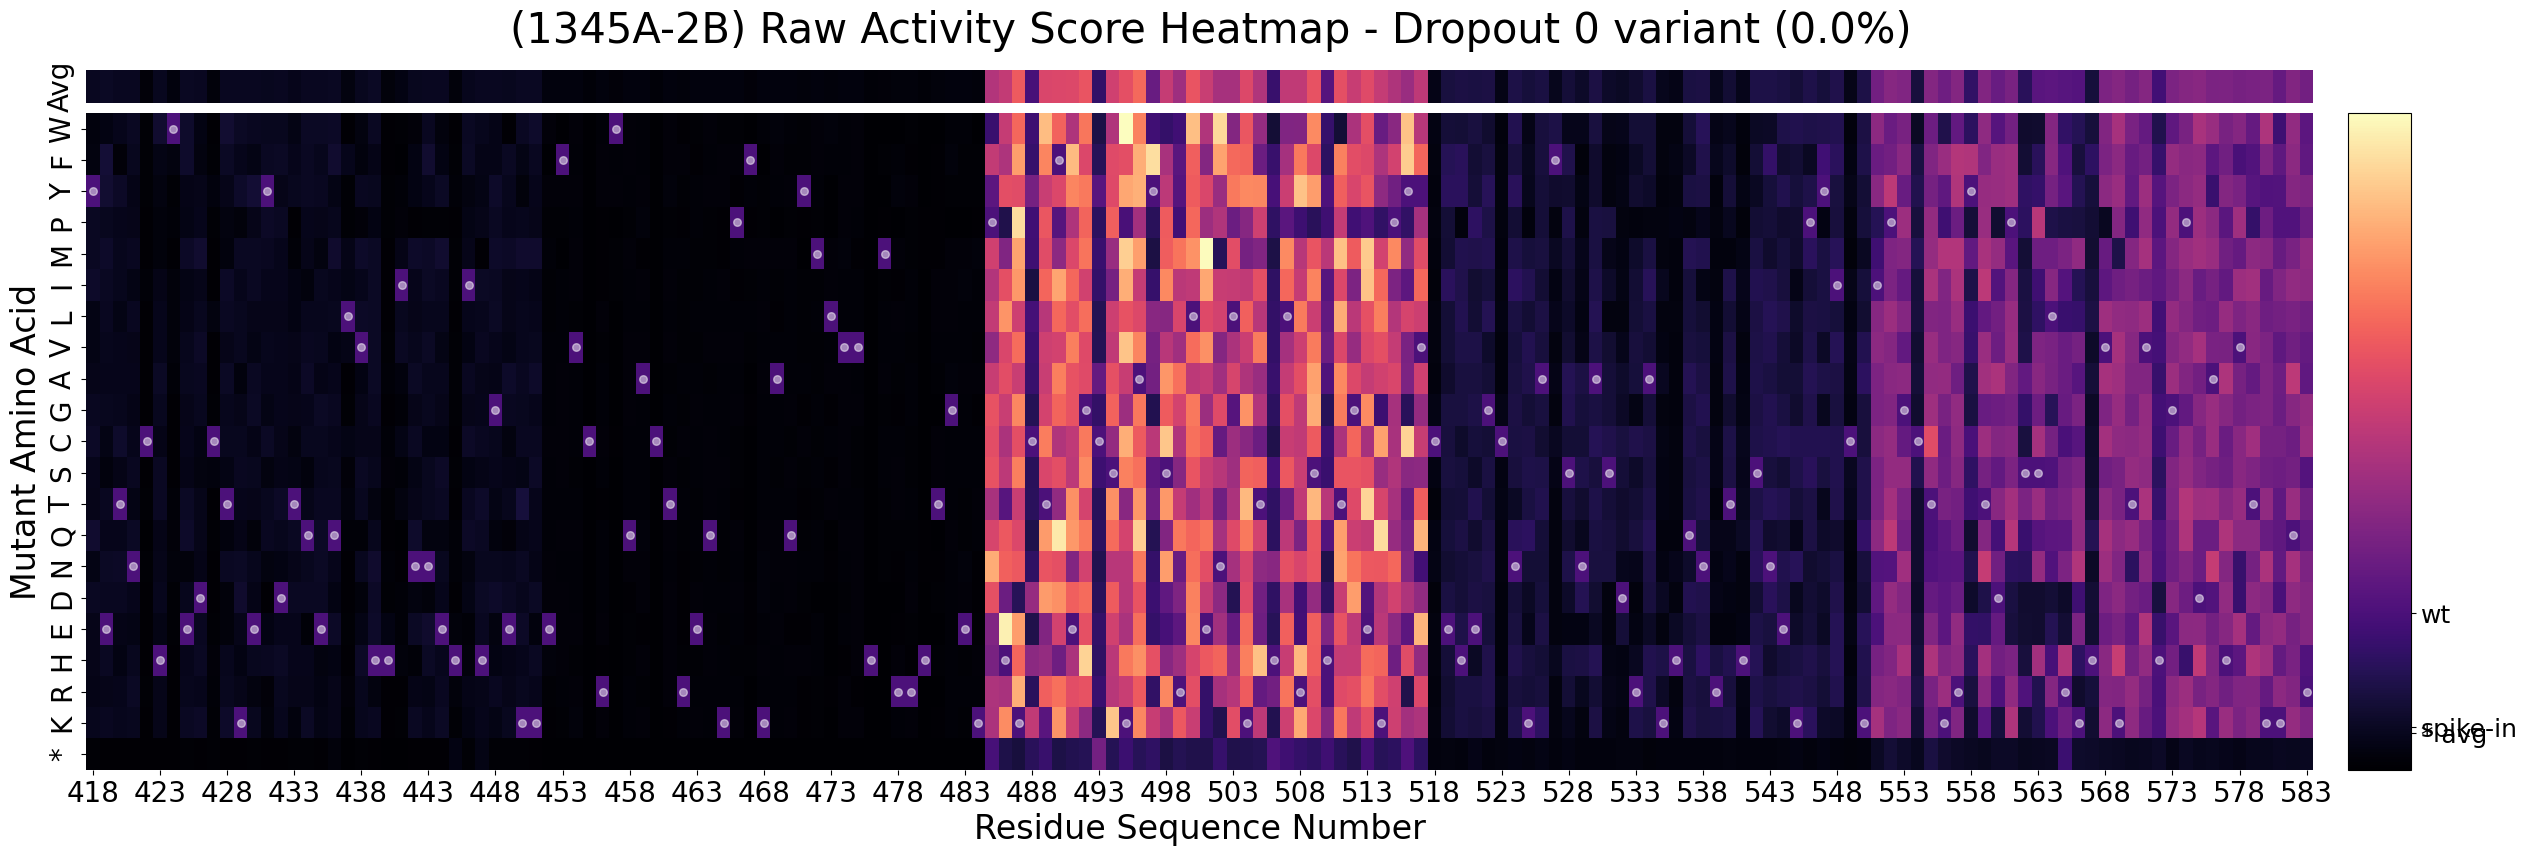

In [ ]:
raw_heatmap = dms_heatmap(df, 
                          title=f'({opool_set}) Raw Activity Score Heatmap', 
                          min_pos=min_position, 
                          max_pos=max_position, 
                          export=export_plot, 
                          output=f'./figures/raw_heatmap_{export_suffix}.png', 
                          tick_values=ticks_raw, 
                          tick_labels=labels_raw, 
                          wt_score=dbd_stats['wt_dna_score_global_raw'], 
                          fig_size='large')

## DMS Matrix - Normalized (2-pole)

### Generate Heatmap DataFrame

In [ ]:
# function returns filled heatmap matrix scaffold
df_2pole = make_dms_matrix(heatmap_scores, 
                           score_col=f'norm_avgscore', 
                           num_aa=dbd_num_aa, 
                           wt_seq=wt_aa_seq, 
                           min_pos=min_position, 
                           mutant_type='aa')
df

,418,419,420,421,422,423,424,425,426,427,...,574,575,576,577,578,579,580,581,582,583
W,496.247937,659.541157,896.476145,1156.757721,224.366057,1580.821233,WT,1437.157823,659.403606,159.286144,...,5949.09533,7957.772912,7304.650256,5944.474687,6456.308989,5158.375191,8141.863883,3621.627858,7042.701322,4797.508015
F,604.35342,1744.135113,392.083771,1014.074489,234.951454,691.260196,597.59017,1413.933807,550.016703,231.075082,...,6677.158587,6790.537794,4806.301256,5645.808239,3987.873475,4371.136255,6217.308097,4939.170567,6770.331355,4953.725126
Y,WT,1625.817555,1293.831915,782.897174,278.767588,592.703193,225.960754,805.339247,832.348328,485.945227,...,6760.071582,7138.998636,3395.013302,6415.013217,6046.82982,4565.752051,4339.495763,4358.573976,6506.048742,6246.09504
P,1140.464534,1027.871965,897.34291,843.963084,187.682301,459.934216,290.005493,712.116699,907.539005,229.271448,...,WT,7487.752844,6750.556617,4685.74489,7524.395043,3228.053237,5526.298295,4303.816897,4325.737209,5436.937097
M,1157.823401,1332.933689,961.616926,1132.907382,183.38318,433.420065,156.607971,1320.361134,1575.270196,208.553442,...,7269.517864,7643.147939,7353.661489,5611.300234,5147.174519,6791.792739,6613.838302,5256.502809,6022.693189,6963.275594
I,1380.848423,1176.772268,949.305297,737.508904,303.323233,764.717235,466.974694,716.799725,825.613233,152.11502,...,6758.418473,5336.341093,5906.980392,5036.031587,7495.708064,7685.671826,5228.068314,6261.261821,7009.563294,6806.201959
L,697.286422,1109.042183,730.989302,1097.716066,158.221201,923.934008,428.63914,784.067963,1010.149755,549.473533,...,6418.143804,5630.563629,5532.196671,7186.49513,6200.123624,6696.859414,5569.690813,5751.92343,5995.913585,5633.393368
V,701.547137,985.004098,938.50799,827.385873,173.919809,909.358454,429.606368,942.373975,1276.756968,211.259006,...,7044.890496,7821.051338,6010.548303,5962.26696,WT,6623.135553,6161.476129,4913.506861,5651.105477,5130.109898
A,865.069181,896.349556,936.202082,897.538429,182.59351,1245.818746,316.133407,1069.388902,1085.577636,183.293245,...,6344.140788,5674.928895,WT,8107.496511,5913.959654,5103.257891,6250.477362,5498.284321,8743.904515,4987.460656
G,1079.400919,1057.987294,970.422631,768.428375,203.754736,1067.159744,204.103479,812.414543,1013.12028,274.191475,...,5055.804209,6537.361562,7279.365741,6526.447008,5774.025951,6085.701779,6236.586458,5450.922586,6547.601455,7059.767374


### Tick marks - Global, Normalized

In [ ]:
# lookup the values that will be used to label the heatmap colorbar
# colorbar_ticks_global_norm = get_tick_marks(dbd_stats, 'global_norm')
# pprint.pprint(colorbar_ticks_global_norm)

### Tick Marks - Individual oPools, Normalized

In [ ]:
# colorbar_ticks_opool1 = get_tick_marks(dbd_stats, 'opool1_norm')
# colorbar_ticks_opool2 = get_tick_marks(dbd_stats, 'opool2_norm')
# colorbar_ticks_opool3 = get_tick_marks(dbd_stats, 'opool3_norm')
# colorbar_ticks_opool4 = get_tick_marks(dbd_stats, 'opool4_norm')
# colorbar_ticks_opool5 = get_tick_marks(dbd_stats, 'opool5_norm')

### Plot Heatmap

In [ ]:
ticks = [
    dbd_stats['wt_dna_score_global_norm'], 
    #dbd_stats['spike_in_avg_global_norm'], 
    dbd_stats['non_avg_global_norm']
]
labels = [
    'wt', 
    #'spike-in', 
    '* (avg)'
]

Total number of possible variants (19 AA variants, 1 stop codon)*positions + 1 WT): 3321
Number of variants that were not observed (total dropout): 0
Percent dropout: 0.0
Min: 239.7370555187618, Max: 5264.52071773601


/ref/dblab/software/opool/code/src/figures.py:149: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = heatmap_df.replace('WT', wt_dna_score).astype(float)


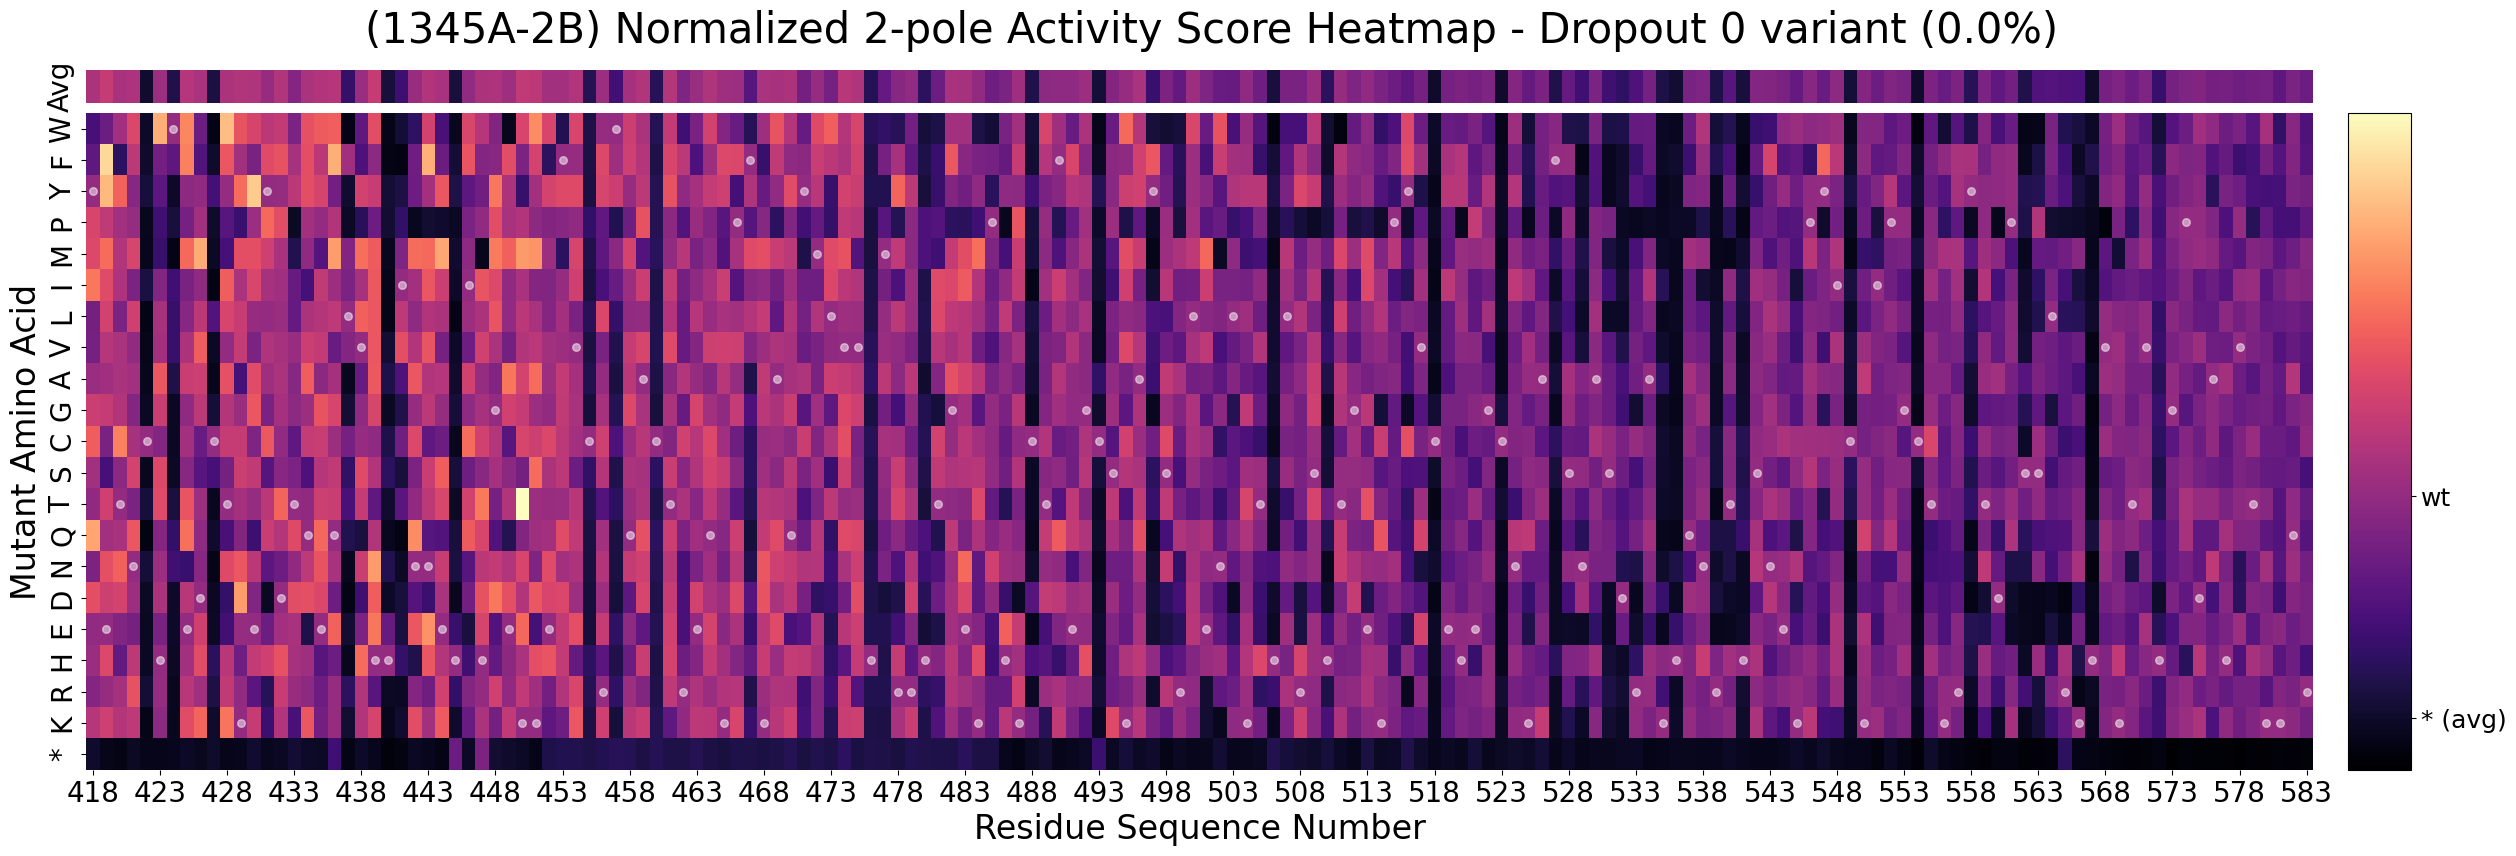

In [ ]:
two_pole_heatmap = dms_heatmap(df_2pole, 
                               title=f'({opool_set}) Normalized 2-pole Activity Score Heatmap', 
                               min_pos=min_position, 
                               max_pos=max_position, 
                               export=export_plot, 
                               output=f'./figures/Findlay-norm_heatmap_{export_suffix}.png', 
                               tick_values=ticks,
                               tick_labels=labels, 
                               wt_score=dbd_stats['wt_dna_score_global_norm'],
                               fig_size='large')

## DMS Matrix - Normalized (z-score)

### Generate Heatmap DataFrame

In [ ]:
# function returns filled heatmap matrix scaffold
df_zscore = make_dms_matrix(heatmap_scores, 
                            score_col=f'norm_avgscore2_final', 
                            num_aa=dbd_num_aa, 
                            wt_seq=wt_aa_seq, 
                            min_pos=min_position,
                            mutant_type='aa')
df

,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583
W,496.247937,659.541157,896.476145,1156.757721,224.366057,1580.821233,WT,1437.157823,659.403606,159.286144,1642.32943,1225.100498,1123.917073,1007.783846,1039.982718,733.896841,1208.404329,1265.848741,1280.749667,163.438817,604.372583,1187.824128,170.548357,265.479824,398.935308,1113.098212,502.910969,189.797922,1143.533527,983.908939,757.413612,181.932046,1139.646422,1459.955742,393.292605,118.175793,393.158907,108.237714,293.524357,WT,371.93236,326.051313,122.461567,359.16963,162.975552,249.372586,382.648266,265.892262,222.435232,126.657746,...,1787.584868,566.805324,551.194708,1848.294434,2694.516924,755.513482,979.608742,520.812528,1233.559916,1307.885364,2279.934604,2406.533022,2257.195261,2323.37279,2450.493302,529.923878,2144.38299,6817.281866,5352.087876,5944.315412,1248.568788,5487.139615,2319.228302,5037.514371,2869.958715,6898.186081,4504.246308,5771.300229,1464.285507,1546.441063,6411.981317,3067.466726,2622.241318,1915.682751,6355.135296,7850.474202,6032.082697,5093.735762,2416.394108,4929.605461,5949.09533,7957.772912,7304.650256,5944.474687,6456.308989,5158.375191,8141.863883,3621.627858,7042.701322,4797.508015
F,604.35342,1744.135113,392.083771,1014.074489,234.951454,691.260196,597.59017,1413.933807,550.016703,231.075082,1240.596422,901.669342,715.731394,1174.537638,1218.683733,920.102585,1193.801684,1003.112533,1580.386317,893.314163,516.376323,805.463015,151.920032,147.856416,674.845018,1590.364363,654.833581,262.312438,1228.137634,763.438965,788.266125,1189.30624,734.529049,1117.713938,132.617022,WT,294.161939,105.112904,399.417073,305.928722,376.562296,337.457687,109.024762,392.636319,349.689073,182.382438,304.075488,401.366861,398.410739,WT,...,1774.050845,603.925986,686.155397,1276.656365,2357.874144,966.225219,1408.569966,456.312749,1770.02723,3149.345509,1562.123907,1695.986845,1197.463062,3671.814309,2808.652276,641.4878,2258.318028,5383.472256,5679.1603,6709.614327,2059.428284,6270.424065,7350.312115,8361.228833,8278.221498,6290.521763,7337.148372,7554.08359,1696.642989,2749.365009,6541.885731,4223.861448,1956.285754,2920.470916,6125.068459,6770.127591,5220.488378,5762.472583,3263.173994,7132.122275,6677.158587,6790.537794,4806.301256,5645.808239,3987.873475,4371.136255,6217.308097,4939.170567,6770.331355,4953.725126
Y,WT,1625.817555,1293.831915,782.897174,278.767588,592.703193,225.960754,805.339247,832.348328,485.945227,844.067021,1334.253734,1691.945843,WT,843.320025,1004.607159,1197.619453,1122.479601,689.501629,244.402541,1112.61599,1062.005641,267.779522,307.263688,664.682568,906.314716,1247.352281,312.32078,596.970561,682.135217,1381.345613,941.316892,427.051669,900.439709,386.276274,402.327859,402.13149,104.155148,391.670544,372.101694,292.89356,350.436107,121.93438,419.698079,281.76503,315.196148,361.037746,376.959232,167.341761,329.79098,...,1356.875211,501.93084,561.509782,2069.675309,2160.021622,536.156634,1837.063613,708.139504,1196.439069,1897.593912,2384.16947,1882.515081,2306.230567,WT,2031.626541,835.853475,1783.359835,6713.599837,8771.842589,5275.170315,2406.235702,5849.733616,4940.368658,8240.250085,WT,7211.019933,7304.052307,7570.445139,3007.052566,3204.016741,5835.978524,4671.170249,2548.723171,1913.659757,6777.171853,7341.991935,5031.017035,7466.118686,4532.130944,6064.325072,6760.071582,7138.998636,3395.013302,6415.013217,6046.82982,4565.752051,4339.495763,4358.573976,6506.048742,6246.09504
P,1140.464534,1027.871965,897.34291,843.963084,187.682301,459.934216,290.005493,712.116699,907.539005,229.271448,569.083778,448.290502,872.056067,1323.44741,1191.07559,208.560006,904.469389,834.0

### Tick marks - Global, Normalized

In [ ]:
# lookup the values that will be used to label the heatmap colorbar
# colorbar_ticks_global_norm2 = get_tick_marks(dbd_stats, 'global_norm2_final')
# pprint.pprint(colorbar_ticks_global_norm2)

### Tick Marks - Individual oPools, Normalized

In [ ]:
# colorbar_ticks_opool1_norm2 = get_tick_marks(dbd_stats, 'opool1_norm2_final')
# colorbar_ticks_opool2_norm2 = get_tick_marks(dbd_stats, 'opool2_norm2_final')
# colorbar_ticks_opool3_norm2 = get_tick_marks(dbd_stats, 'opool3_norm2_final')
# colorbar_ticks_opool4_norm2 = get_tick_marks(dbd_stats, 'opool4_norm2_final')
# colorbar_ticks_opool5_norm2 = get_tick_marks(dbd_stats, 'opool5_norm2_final')

### Plot Heatmap

In [ ]:
ticks2 = [
    dbd_stats['wt_dna_score_global_norm2_final'], 
    #dbd_stats['spike_in_avg_global_norm2_final'], 
    dbd_stats['non_avg_global_norm2_final']
]
labels2 = [
    'wt', 
    #'spike-in',
    '* (avg)'
]

Total number of possible variants (19 AA variants, 1 stop codon)*positions + 1 WT): 3321
Number of variants that were not observed (total dropout): 0
Percent dropout: 0.0
Min: -2.7437560335382356, Max: 3.2078960403095227


/ref/dblab/software/opool/code/src/figures.py:149: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = heatmap_df.replace('WT', wt_dna_score).astype(float)


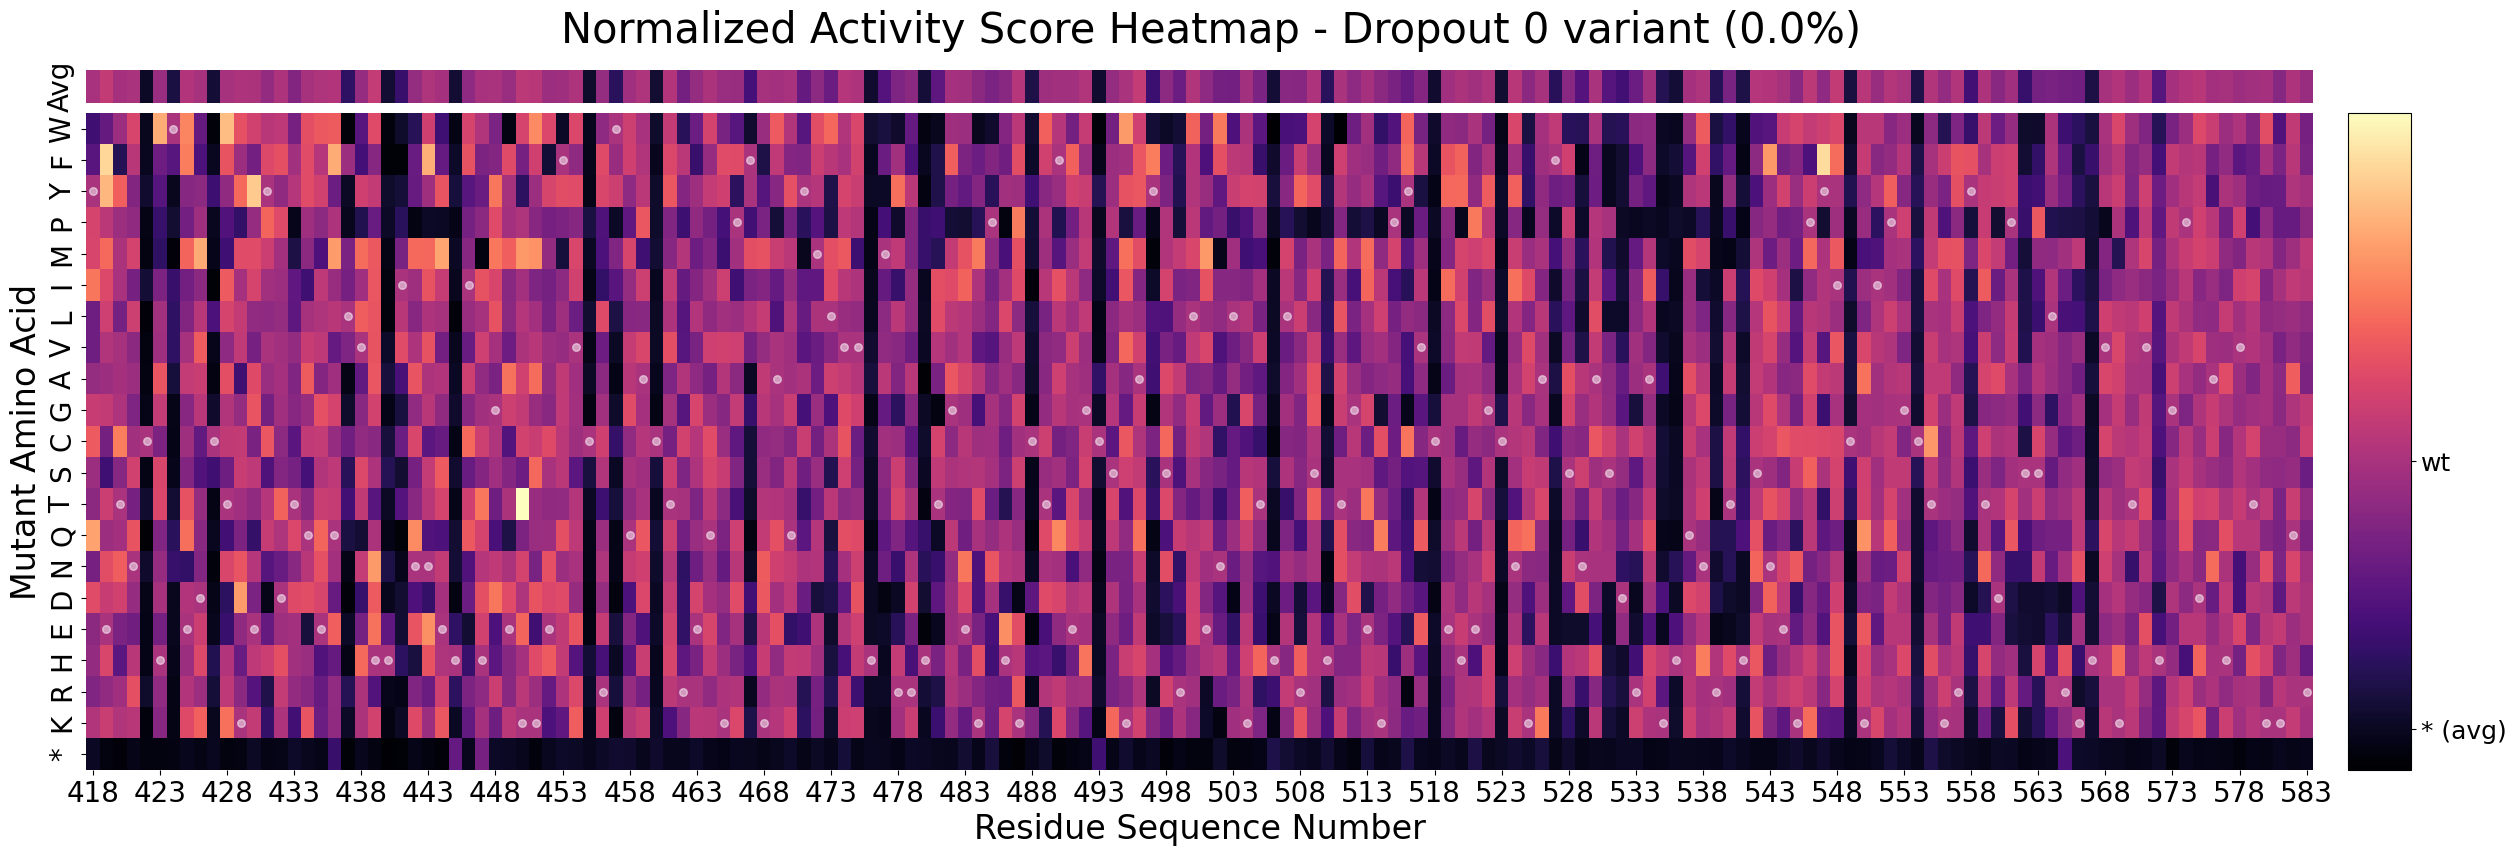

In [ ]:
dms_heatmap(df_zscore, 
            title=f'Normalized Activity Score Heatmap', 
            min_pos=min_position, 
            max_pos=max_position, 
            export=export_plot, 
            output=f'./figures/zscore_heatmap_{export_suffix}.png', 
            tick_values=ticks2,
            tick_labels=labels2,
            wt_score = dbd_stats['wt_dna_score_global_norm2_final'],
            fig_size='large')

### C2H2 indices

In [ ]:
# List of columns to highlight (make less transparent)
c2h2_indices_adj = [422 - 418, 
        427 - 418, 
        440 - 418, 
        445- 418, 
        455  - 418, 
        460 - 418, 
        476 - 418, 
        480 - 418, 
        518 - 418,
        523 - 418, 
        536 - 418, 
        541 - 418, 
        549 - 418, 
        554 - 418, 
        567 - 418, 
        572 - 418]

### Export scores

In [ ]:
if export_scores:
    filename = f'dbd_stats_{export_suffix}.json'

    # Export the dbd_stats dictionary to a JSON file
    with open(filename, 'w') as json_file:
        json.dump(dbd_stats, json_file, indent=4)

    # Export synonymous scores
    synonymous_scores.to_csv(f'syn_scores_{export_suffix}.csv', index=False)

    # Export AA level missense scores
    heatmap_scores.to_csv(f'heatmap_scores_{export_suffix}.csv', index=False)

### Positional Averages

In [ ]:
import matplotlib.colors as mcolors
df_zscore.replace(to_replace='WT', value=dbd_stats['wt_dna_score_global_norm2_final'], inplace=True)

# Calculate the average of all columns in df_zscore
averages = df_zscore.mean()

# Normalize the color mapping to the heatmap values
norm = mcolors.Normalize(vmin=df_zscore.min().min(), vmax=df_zscore.max().max())

# Create a colormap using the magma color theme
colormap = plt.cm.magma

# Map the normalized values to the colormap and convert to hex
colors = [mcolors.to_hex(colormap(norm(value))) for value in averages]

# Create a new DataFrame with 'position', 'average', and 'color' columns
average_df = pd.DataFrame({
    'position': averages.index,
    'average': averages.values,
    'color': colors
})

average_df

/tmp/ipykernel_1027624/3060227105.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_zscore.replace(to_replace='WT', value=dbd_stats['wt_dna_score_global_norm2_final'], inplace=True)


,position,average,color
0,418,-0.075115,#a02f7f
1,419,0.263887,#b83779
2,420,-0.131795,#9c2e7f
3,421,-0.071690,#a02f7f
4,422,-2.331197,#0b0924
...,...,...,...
161,579,-0.182601,#992d80
162,580,-0.134218,#9c2e7f
163,581,-0.545010,#802582
164,582,-0.012704,#a5317e


### Heatmap clustering  

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# Convert averages to a dictionary for easy lookup
average_dict = average_df.set_index('position')['average'].to_dict()

# Fill missing values in df_zscore
df_zscore = df_zscore.apply(lambda col: col.fillna(average_dict[col.name]), axis=0)

# Update WT score
df_zscore.replace(to_replace='WT', value=dbd_stats['wt_dna_score_global_norm2_final'], inplace=True)

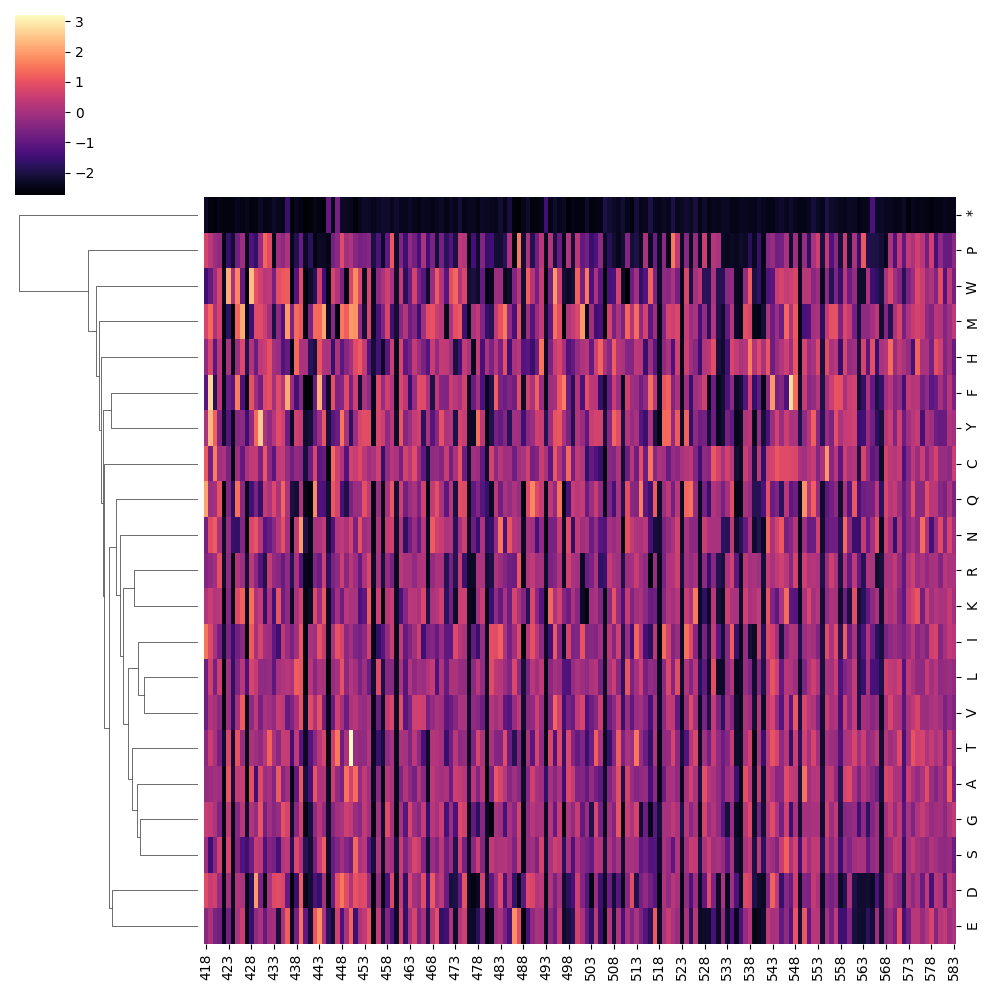

In [ ]:
# Perform hierarchical clustering
row_clusters = linkage(df_zscore.values, method='average', metric='euclidean')
#col_clusters = linkage(df_zscore.values.T, method='average', metric='euclidean')

# Plot heatmap with seaborn
sns.clustermap(df_zscore, metric='euclidean', method='average', row_cluster=True, col_cluster=False,
               row_linkage=row_clusters, cmap='magma')
plt.show()